# Dependencias

In [351]:
import pandas as pd
import os
import re
import numpy as np
from varclushi import VarClusHi
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

from functools import reduce

# Lectura de Datos

In [741]:
a=[]
for file in os.listdir(r'C:\Users\VDMG015\Documents\Tere\Cluster Masivo\Datos_sep'):
        df=pd.read_csv('Datos_sep/'+file, sep='\t')
        print(file)
        a.append(df)
cons=pd.concat(a)

datos.csv
datos1.csv
datos2.csv
datos3.csv
datos4.csv
datos5.csv
datos6.csv
datos_charly.csv


In [742]:
a=[]
for file in os.listdir(r'C:\Users\VDMG015\Documents\Tere\Cluster Masivo\Montos'):
        df=pd.read_csv('Montos/'+file, sep='\t')
        print(file)
        a.append(df)
mon=pd.concat(a)

Montos.csv
Montos1.csv
Montos2.csv
Montos3.csv
Montos4.csv
Montos5.csv
Montos6.csv
Montos_charly.csv


In [743]:
a=[]
for file in os.listdir(r'C:\Users\VDMG015\Documents\Tere\Cluster Masivo\SMS'):
        df=pd.read_csv('SMS/'+file, sep='\t')
        print(file)
        a.append(df)
sms=pd.concat(a)

sms.csv
sms1.csv
sms2.csv
sms3.csv
sms4.csv
sms5.csv
sms6.csv
SMS_charly.csv


In [744]:
a=[]
for file in os.listdir(r'C:\Users\VDMG015\Documents\Tere\Cluster Masivo\Voz'):
        df=pd.read_csv('Voz/'+file, sep='\t')
        print(file)
        a.append(df)
voz=pd.concat(a)

voz.csv
voz1.csv
voz2.csv
voz3.csv
voz4.csv
voz5.csv
voz6.csv
Voz_charly.csv


In [745]:
a=[]
for file in os.listdir(r'C:\Users\VDMG015\Documents\Tere\Cluster Masivo\Datos'):
        df=pd.read_csv('Datos/'+file, sep='\t')
        print(file)
        a.append(df)
dat=pd.concat(a)

Datos.csv
Datos1.csv
Datos2.csv
Datos3.csv
Datos4.csv
Datos5.csv
Datos6.csv
Datos_charly.csv


In [746]:
um=['linea','mesproceso']

In [747]:
cruzar = lambda x,y:pd.merge(x,y,on=um,how='outer')

In [748]:
l=[cons,mon,sms,voz,dat]

In [749]:
df=reduce(cruzar,l)

In [750]:
df=df[df['tiposuscripcion'].notna()].reset_index(drop=True)

In [751]:
df.drop_duplicates(inplace=True)

In [752]:
df.columns

Index(['linea', 'mesproceso', 'estatuslinea', 'plan', 'modeloeq',
       'tiposuscripcion', 'conmbredsoc', 'conmbwhatsapp', 'conmbuber',
       'conmbyoutube', 'conmbinstagr', 'conmbotros', 'conmb4g', 'conmb3g',
       'conmb2g', 'conmbotrostec', 'conmbsnapchat', 'tipoeq', 'monto',
       'monto_prom', 'monto_min', 'monto_max', 'recargas', 'sms_in', 'sms_out',
       'cv_sms_in', 'cv_sms_out', 'llamadas_in', 'llamadas_out', 'segundos_in',
       'segundos_out', 'rounded_mous_in', 'rounded_mous_out',
       'tiempo_respuesta_in', 'tiempo_respuesta_out', 'rounded_tot_mous_in',
       'rounded_tot_mous_out', 'cv_segundos_in', 'cv_segundos_out',
       'connections', 'downlink', 'uplink', 'cv_connections', 'cv_downlink',
       'cv_uplink'],
      dtype='object')

In [753]:
df=df.sort_values(['mesproceso','linea'])

In [754]:
df[['conmbredsoc', 'conmbwhatsapp', 'conmbuber',
       'conmbyoutube', 'conmbinstagr', 'conmbotros', 'conmb4g', 'conmb3g',
       'conmb2g', 'conmbotrostec', 'conmbsnapchat','monto',
       'monto_min', 'monto_max', 'recargas', 'sms_out', 'llamadas_out',
       'segundos_out',
       'connections', 'downlink', 'uplink']]=df[['conmbredsoc', 'conmbwhatsapp', 'conmbuber',
       'conmbyoutube', 'conmbinstagr', 'conmbotros', 'conmb4g', 'conmb3g',
       'conmb2g', 'conmbotrostec', 'conmbsnapchat','monto',
       'monto_min', 'monto_max', 'recargas', 'sms_out', 'llamadas_out',
       'segundos_out',
       'connections', 'downlink', 'uplink']].replace('(null)',0).astype(float)

# Ingeniería de Variables

In [755]:
#Mínimo, Máximo, Suma, Coeficiente de Variación 
l=[]
for i in ['conmbredsoc', 'conmbwhatsapp', 'conmbuber',
       'conmbyoutube', 'conmbinstagr', 'conmbotros', 'conmb4g', 'conmb3g',
       'conmb2g', 'conmbotrostec', 'conmbsnapchat','monto',
       'monto_min', 'monto_max', 'recargas', 'sms_out', 'llamadas_out',
       'segundos_out',
       'connections', 'downlink', 'uplink']:
        piv = df.pivot_table(index='linea',
                              columns='mesproceso',
                              values=i,
                              aggfunc='sum') 
        piv[f'x_prom_'+i] = piv.mean(axis=1)
        piv[f'x_min_'+i] = piv.min(axis=1)
        piv[f'x_max_'+i] = piv.max(axis=1)
        piv[f'x_cv_'+i] =piv.std(axis=1)/piv.mean(axis=1)
        l.append(piv.filter(like='x_'))


In [756]:
aux = reduce(lambda x,y:pd.merge(x,
                                  y,
                                  left_index=True,
                                  right_index=True,
                                  how='outer'),l).reset_index()

In [757]:
aux=aux.replace(np.inf,np.nan)

# Análisis Exploratorio de Datos

## Missings

In [758]:
miss = 1 - aux.describe().T[['count']]/len(aux)
miss = miss.sort_values(by='count',ascending=False)
miss

count
mesproceso                   
x_cv_conmbotrostec   0.894788
x_cv_conmbuber       0.493401
x_cv_conmbsnapchat   0.323153
x_cv_monto_min       0.197619
x_cv_monto_max       0.197619
...                       ...
x_max_conmb3g        0.000000
x_min_conmb3g        0.000000
x_prom_conmb3g       0.000000
x_max_conmb4g        0.000000
x_min_conmbsnapchat  0.000000

[85 rows x 1 columns]

In [759]:
aux=aux.drop(miss[miss['count']>.2].index, axis=1)

### Input Mediana

In [760]:
from sklearn.impute import SimpleImputer

In [761]:
varc=[x for x in aux.filter(like='x_').columns]
um=['linea']

In [762]:
im = SimpleImputer(strategy='median')
im.fit(aux[varc])

SimpleImputer(strategy='median')

In [763]:
Xi = pd.DataFrame(im.transform(aux[varc]),columns=varc)

In [764]:
Xi=pd.concat([Xi,aux['linea']],axis=1)

In [765]:
Xi.dropna().shape,Xi.shape

((53340, 82), (53340, 82))

### Estadígrafo de KS

In [766]:
from scipy.stats import ks_2samp,kruskal

In [767]:
ks = pd.DataFrame(map(lambda v:(v,ks_2samp(Xi[v],aux[v].dropna()).statistic),varc),
             columns=['variable','ks'])
rotas = ks.loc[ks['ks']>0.1]['variable'].tolist()

In [768]:
ks.head()

variable       ks
0    x_prom_conmbredsoc  0.00000
1     x_min_conmbredsoc  0.00000
2     x_max_conmbredsoc  0.00000
3      x_cv_conmbredsoc  0.00928
4  x_prom_conmbwhatsapp  0.00000

In [769]:
rotas

[]

In [789]:
cuenta=df['linea'].value_counts().reset_index()

In [790]:
cuenta.columns=['linea','meses_registro']

In [788]:
cha=pd.read_csv('Gustos/prepago_merge.csv')

In [791]:
Xi=Xi.merge(cuenta, how='left', on='linea')

In [797]:
Xic=Xi[Xi['linea'].isin(cha['linea'])]

In [798]:
Xi=Xi[~Xi['linea'].isin(cha['linea'])].reset_index(drop=True)

In [800]:
Xi=Xi[Xi['meses_registro']>=12]

In [801]:
Xi.reset_index(drop=True,inplace=True)

In [802]:
prep=Xi[Xi['x_max_monto']!=0].reset_index(drop=True)

In [803]:
prep.shape

(35499, 83)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\VDMG015\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3437, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-804-620597665984>", line 1, in <module>
    prep[varc].hist(figsize=(20,20))
  File "C:\Users\VDMG015\Anaconda3\lib\site-packages\pandas\plotting\_core.py", line 211, in hist_frame
    return plot_backend.hist_frame(
  File "C:\Users\VDMG015\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\hist.py", line 448, in hist_frame
    ax.hist(data[col].dropna().values, bins=bins, **kwds)
  File "C:\Users\VDMG015\Anaconda3\lib\site-packages\matplotlib\__init__.py", line 1447, in inner
    return func(ax, *map(sanitize_sequence, args), **kwargs)
  File "C:\Users\VDMG015\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py", line 6718, in hist
    bars = _barfunc(bins[:-1]+boffset, height, width,
  File "C:\Users\VDMG015\Anaconda3\lib\site-packages\matplotlib\__init__.py

TypeError: object of type 'NoneType' has no len()

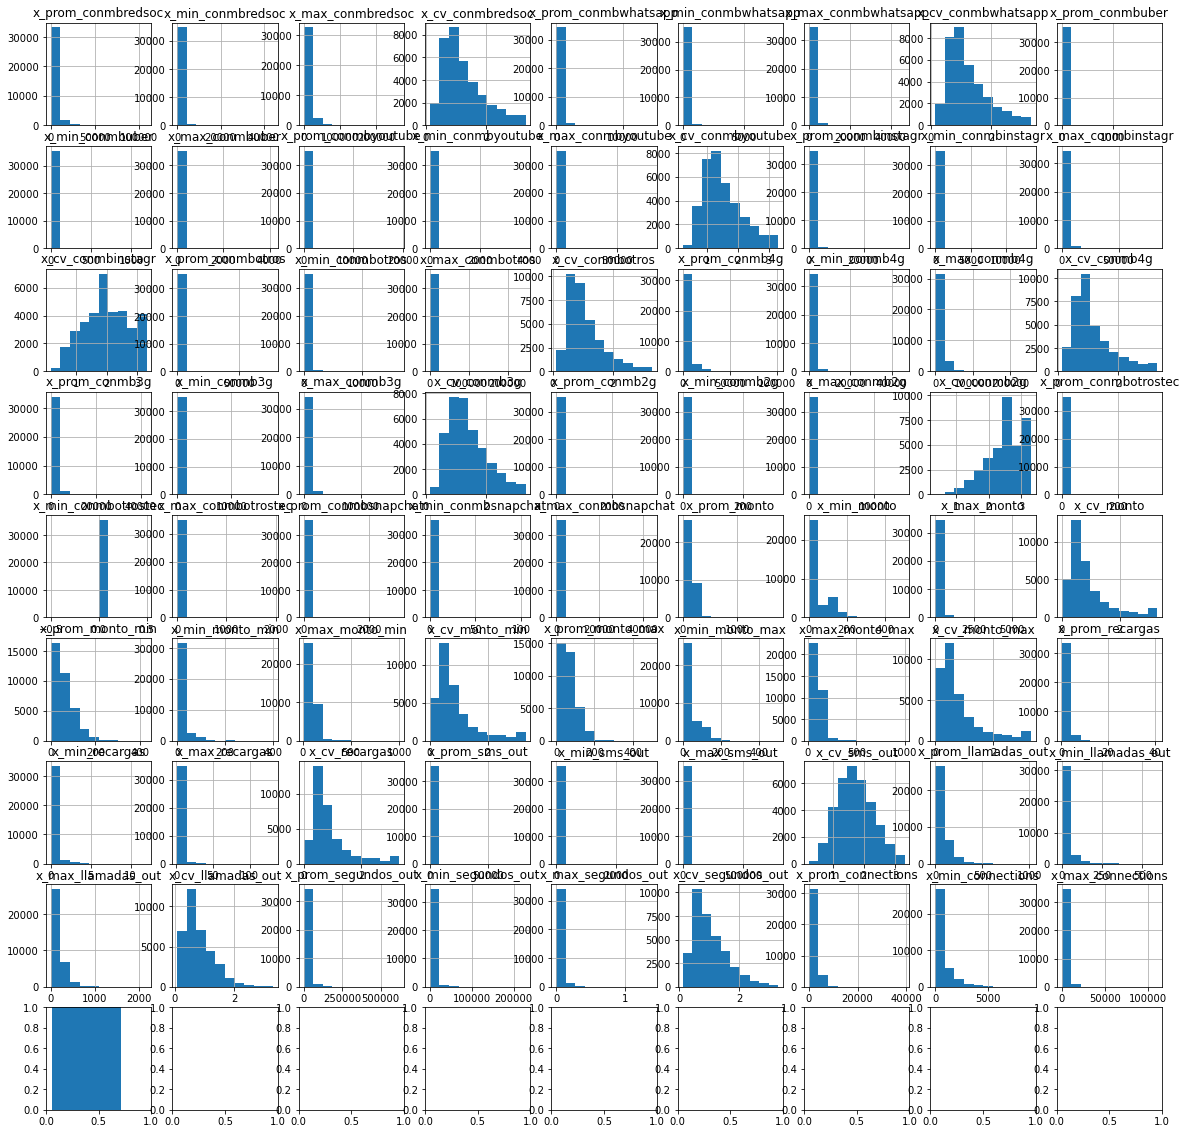

In [804]:
prep[varc].hist(figsize=(20,20))

In [805]:
for v,li,ls in prep[varc].describe(percentiles=[0.01,0.99]).T[['1%','99%']].reset_index().values:
    prep[f'ex_{v}'] = ((prep[v]<li)|(prep[v]>ls)).astype(int)

In [806]:
prep['ex_'] = prep.filter(like= 'ex_').max(axis=1)

In [807]:
prep = prep.loc[prep['ex_']==0].reset_index(drop=True)
prep.drop(prep.filter(like='ex_').columns,axis=1,inplace=True)

In [808]:
prep.dropna().shape ,prep.shape

((23375, 83), (23375, 83))

array([[<AxesSubplot:title={'center':'x_prom_conmbredsoc'}>,
        <AxesSubplot:title={'center':'x_min_conmbredsoc'}>,
        <AxesSubplot:title={'center':'x_max_conmbredsoc'}>,
        <AxesSubplot:title={'center':'x_cv_conmbredsoc'}>,
        <AxesSubplot:title={'center':'x_prom_conmbwhatsapp'}>,
        <AxesSubplot:title={'center':'x_min_conmbwhatsapp'}>,
        <AxesSubplot:title={'center':'x_max_conmbwhatsapp'}>,
        <AxesSubplot:title={'center':'x_cv_conmbwhatsapp'}>,
        <AxesSubplot:title={'center':'x_prom_conmbuber'}>],
       [<AxesSubplot:title={'center':'x_min_conmbuber'}>,
        <AxesSubplot:title={'center':'x_max_conmbuber'}>,
        <AxesSubplot:title={'center':'x_prom_conmbyoutube'}>,
        <AxesSubplot:title={'center':'x_min_conmbyoutube'}>,
        <AxesSubplot:title={'center':'x_max_conmbyoutube'}>,
        <AxesSubplot:title={'center':'x_cv_conmbyoutube'}>,
        <AxesSubplot:title={'center':'x_prom_conmbinstagr'}>,
        <AxesSubplot:title={'c

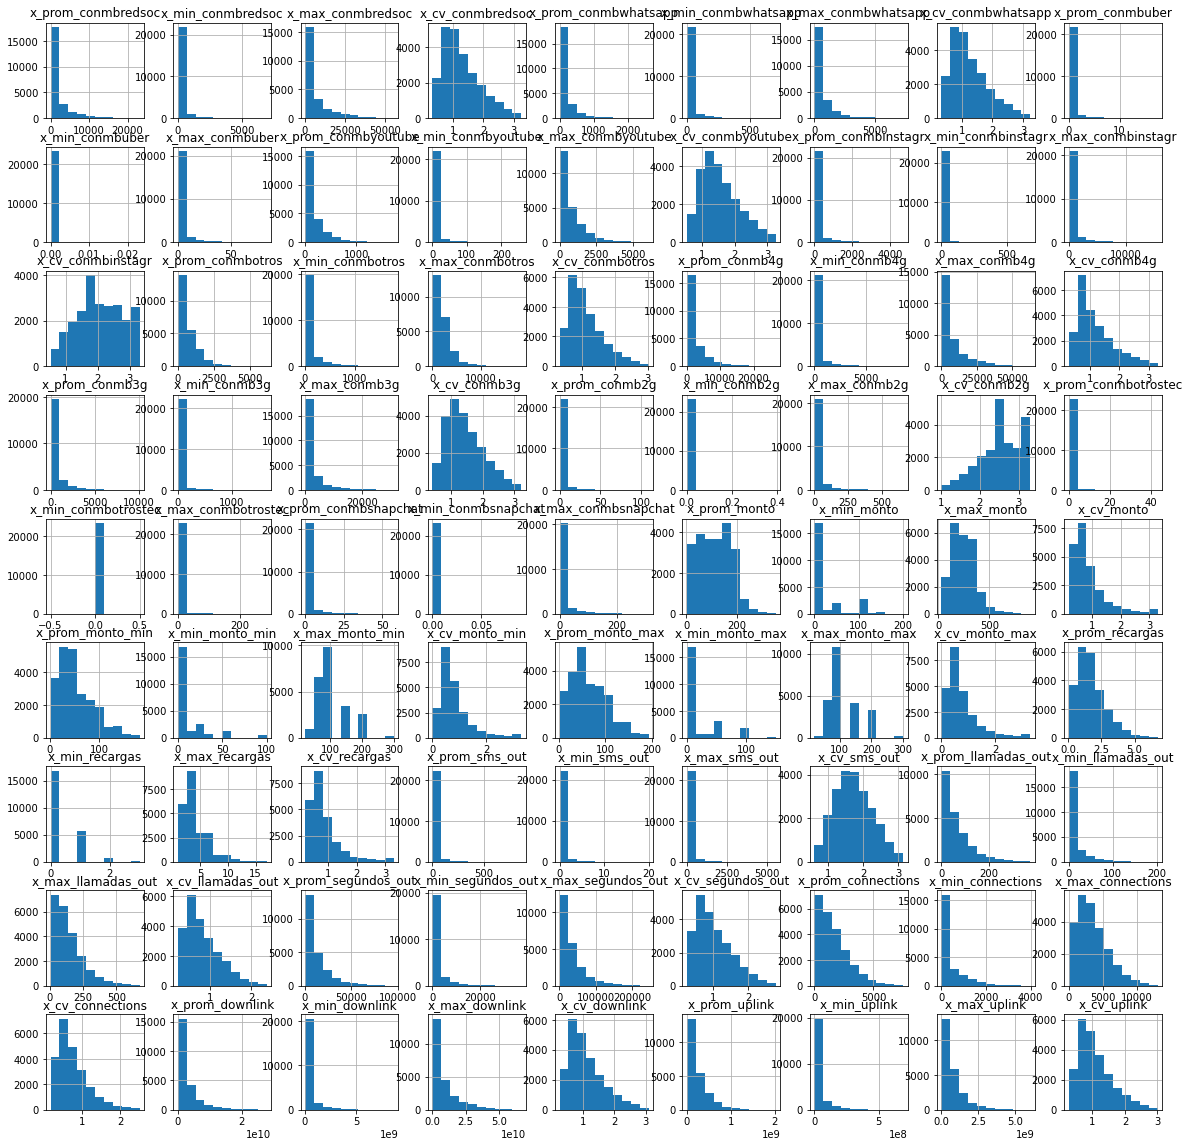

In [393]:
prep[varc].hist(figsize=(20,20))

## PCA

In [809]:
sc= StandardScaler()

In [810]:
X=pd.DataFrame(sc.fit_transform(prep[varc]),columns=varc)

In [811]:
X[um]=prep[um]

In [815]:
pca=PCA()
pca.fit(X.drop(um, axis=1))
Xp = pd.DataFrame(pca.transform(X.drop(um, axis=1)),columns=[f'd%i'%(i+1) for i in range(len(X.drop(um, axis=1).columns))])
Xp[um] = prep[um]
Xp.head()

d1        d2        d3        d4        d5        d6        d7  \
0 -4.432697  1.522557 -0.937001  2.949303 -0.347427  1.573833 -0.685664   
1 -1.276266 -4.736345 -0.600305  1.684645  1.298294  1.063214 -0.179440   
2 -3.218837 -1.543720  0.283312 -0.727331  0.172549 -1.952275  0.082707   
3  4.203014  4.334482 -0.405859  2.490632 -2.756310  1.473895  3.189593   
4  5.847159  2.152307  3.238314  0.446121  2.081442 -2.493456 -1.488026   

         d8        d9       d10       d11       d12       d13       d14  \
0  0.633031  2.006499  0.406092  1.306703  0.802007  0.253446  0.121703   
1 -0.923788 -0.555954 -0.237023  0.663038 -0.382474 -0.746431  0.296488   
2 -0.546608 -0.371516 -0.218122 -0.547080 -0.049729  0.495633 -0.381453   
3 -0.984267 -1.353254 -0.598481 -3.645616  0.941999  1.961771  5.967767   
4 -2.108492 -0.174481  0.565968 -0.583061 -0.142536  1.792755 -0.419585   

        d15       d16       d17       d18       d19       d20       d21  \
0  0.417365  0.092129 -0.453713  0.332089 -0.336795  0.517670 -0.442545   
1 -1.173254  0.461842 -0.008655  0.141178 -1.719185 -0.716111  0.744852   
2  0.575796 -0.489600  0.074634 -0.391916 -0.181703 -0.467686  0.303325   
3 -0.353019  0.119392  1.017842 -0.386448  0.461158 -0.856031 -1.757100   
4  1.467938 -0.787931  1.393415 -1.109216  1.079109  0.147411  0.035928   

        d22       d23       d24       d25       d26       d27       d28  \
0 -0.734660  0.437650  1.347803  0.194681 -0.391415 -0.389541  0.469315   
1 -0.061749 -0.135348  0.460997  0.647240  0.813615  1.016614 -0.534674   
2  0.105621 -0.217101 -0.280879 -0.569855 -0.082895  1.033716 -0.589915   
3  0.749904 -0.020912 -0.307481 -1.396391 -0.252091  0.728795 -0.684261   
4  0.014478  0.078915 -1.055564  1.428223  0.651403 -0.015468 -0.489841   

        d29       d30       d31       d32       d33       d34       d35  \
0 -0.992109 -0.854357  0.643841  0.068807  0.816044 -0.164862 -0.093539   
1  0.467957  0.163191  0.283351 -0.469306 -0.727009 -0.406854  0.201096   
2 -0.013060  0.324361  0.065122 -0.211121  0.225928 -0.309619  0.105939   
3  0.620327 -0.006449  0.123988  0.297080 -0.947836 -0.240106 -0.803561   
4 -0.565148  0.213290 -0.270506 -0.248148  0.214427 -1.113103 -0.327763   

        d36       d37       d38       d39       d40       d41       d42  \
0  0.651066 -0.681201  0.448415  1.281821  1.041040 -0.618409  1.308565   
1  0.490504  0.213367 -0.345930 -0.236183  0.340402  1.470893 -0.476995   
2 -0.086838  0.346560  0.058919 -0.106337 -0.364026 -0.305148  0.064908   
3 -0.088726 -0.814918 -0.396501  0.570212 -0.433843 -0.292219 -0.212479   
4 -0.087441  0.236663  0.026165 -0.416256 -0.525089 -0.309627 -0.344825   

        d43       d44       d45       d46       d47       d48       d49  \
0  0.163434  0.712688  0.148320  0.142994 -0.283475 -0.699208  0.000806   
1 -0.719165  0.271382  0.165185  0.702408  0.501129  0.059669 -0.126615   
2  0.337321  0.129568 -0.334087  0.345030 -0.099977 -0.130161  0.129859   
3 -0.950866  0.288867 -0.276094 -0.371074  0.270646 -0.059681  0.020968   
4  0.411620  0.022183  0.039677  0.473322  0.086355  0.904798  0.408978   

        d50       d51       d52       d53       d54       d55       d56  \
0 -0.002456  0.215332 -0.209744 -0.045925 -0.070713  0.382238 -0.378420   
1 -0.280367 -0.250154 -0.125935 -0.308261  0.064060  0.181127 -0.002134   
2 -0.477264  0.254552  0.760228 -0.043455 -0.084606 -0.101174  0.085558   
3  0.175437 -0.313921 -0.079526 -0.062017  0.471062  0.148668  0.254027   
4  0.469545 -1.176743  0.252607  0.103509 -0.030637 -0.050427  0.025413   

        d57       d58       d59       d60       d61       d62       d63  \
0 -0.402803 -0.329193 -0.086632  0.045324  0.077029  0.168756  0.525703   
1  0.017937 -0.063294 -0.012178 -0.004605 -0.173062  0.009747 -0.089961   
2  0.034076 -0.072947 -0.249249  0.015837 -0.150710  0.082211 -0.077102   
3 -0.321110 -0.137531 -0.212003 -0.326706 -0.292549 -0.257029 -0.116037   
4 -0.083707  0.341108 -0.2

In [817]:
pca.explained_variance_

array([1.96823371e+01, 7.23125975e+00, 4.32306063e+00, 3.77253175e+00,
       3.24123749e+00, 2.77773083e+00, 2.49465496e+00, 2.10345834e+00,
       2.04100039e+00, 1.88755098e+00, 1.81561229e+00, 1.74725926e+00,
       1.66469731e+00, 1.56383330e+00, 1.49451151e+00, 1.46711279e+00,
       1.29275396e+00, 1.18906204e+00, 1.04557802e+00, 9.83742153e-01,
       9.65931101e-01, 9.38374435e-01, 9.14874119e-01, 8.61932387e-01,
       8.15711754e-01, 7.42876286e-01, 6.85656014e-01, 6.40038294e-01,
       6.19819730e-01, 6.07570414e-01, 5.98517202e-01, 5.92189392e-01,
       5.42625540e-01, 4.79805653e-01, 4.62630014e-01, 4.51182630e-01,
       4.04925286e-01, 3.81748371e-01, 3.64595338e-01, 3.19259557e-01,
       2.99801086e-01, 2.90407631e-01, 2.67076912e-01, 2.63990018e-01,
       2.20011879e-01, 1.84116487e-01, 1.76286576e-01, 1.66368258e-01,
       1.43709304e-01, 1.37373845e-01, 1.24930988e-01, 1.21874391e-01,
       1.12574591e-01, 1.05156573e-01, 1.01039267e-01, 9.64739678e-02,
      

In [816]:
pca.explained_variance_ratio_.cumsum()

array([0.24601869, 0.33640557, 0.39044151, 0.43759614, 0.47810988,
       0.51283003, 0.54401188, 0.57030399, 0.5958154 , 0.61940878,
       0.64210296, 0.66394277, 0.68475059, 0.70429767, 0.72297827,
       0.74131639, 0.75747513, 0.77233777, 0.78540693, 0.79770318,
       0.80977681, 0.82150598, 0.83294142, 0.84371512, 0.85391108,
       0.86319663, 0.87176697, 0.8797671 , 0.88751452, 0.89510882,
       0.90258997, 0.90999202, 0.91677455, 0.92277186, 0.92855449,
       0.93419403, 0.93925538, 0.94402703, 0.94858428, 0.95257485,
       0.9563222 , 0.95995214, 0.96329046, 0.9665902 , 0.96934023,
       0.97164159, 0.97384507, 0.97592459, 0.97772088, 0.97943798,
       0.98099955, 0.98252291, 0.98393003, 0.98524444, 0.98650737,
       0.98771325, 0.9888574 , 0.98991941, 0.99093273, 0.99188912,
       0.99280633, 0.99371004, 0.99457225, 0.99538262, 0.99603133,
       0.99661983, 0.99716856, 0.99766081, 0.99809587, 0.9984632 ,
       0.99878596, 0.99910003, 0.99939765, 0.99961963, 0.99978

In [818]:
feat_imp=pd.DataFrame(pca.components_.T,columns=[f'd%i'%(i+1) for i in range(len(varc))], index=varc)

In [819]:
feat_imp

d1        d2        d3        d4        d5  \
x_prom_conmbredsoc    0.146458  0.170877 -0.133633 -0.078009  0.125068   
x_min_conmbredsoc     0.125257  0.094765  0.098457  0.100387  0.254090   
x_max_conmbredsoc     0.122376  0.185625 -0.191550 -0.122784  0.105715   
x_cv_conmbredsoc     -0.160510  0.046190 -0.053950 -0.027262  0.145879   
x_prom_conmbwhatsapp  0.120196  0.088413 -0.015029 -0.054840  0.008465   
...                        ...       ...       ...       ...       ...   
x_cv_downlink        -0.171562  0.077020 -0.088926 -0.034262  0.174245   
x_prom_uplink         0.177294  0.147652 -0.060015 -0.008020 -0.008986   
x_min_uplink          0.154829  0.078329  0.155636  0.149325  0.190415   
x_max_uplink          0.130965  0.149205 -0.097528 -0.035211 -0.030988   
x_cv_uplink          -0.165599  0.070053 -0.068362 -0.032002  0.144654   

                            d6        d7        d8        d9       d10  \
x_prom_conmbredsoc   -0.009971 -0.098442 -0.170970 -0.065139  0.037171   
x_min_conmbredsoc    -0.003783 -0.048740 -0.042046 -0.083755  0.083727   
x_max_conmbredsoc     0.041829 -0.070428 -0.166862 -0.022782  0.004381   
x_cv_conmbredsoc      0.199230  0.036227  0.044750  0.062377 -0.051336   
x_prom_conmbwhatsapp -0.064739  0.153964  0.093511  0.074930 -0.120817   
...                        ...       ...       ...       ...       ...   
x_cv_downlink         0.210340  0.052232  0.035896  0.039847 -0.050366   
x_prom_uplink        -0.005564  0.037677  0.028560  0.019611 -0.008517   
x_min_uplink         -0.001275  0.015840  0.078900 -0.001484  0.032277   
x_max_uplink          0.060712  0.072622  0.046065  0.062607 -0.029392   
x_cv_uplink           0.215572  0.072572  0.051112  0.027460 -0.041167   

                           d11       d12       d13       d14       d15  \
x_prom_conmbredsoc   -0.004955 -0.103156  0.001004  0.130496 -0.027743   
x_min_conmbredsoc    -0.028328 -0.042606  0.170742  0.081051  0.169399   
x_max_conmbredsoc    -0.011232 -0.075944 -0.049740  0.116344 -0.065951   
x_cv_conmbredsoc     -0.023376  0.036319 -0.016853 -0.018416  0.015251   
x_prom_conmbwhatsapp  0.096832 -0.075312  0.233912 -0.179984 -0.232372   
...                        ...       ...       ...       ...       ...   
x_cv_downlink        -0.025698  0.018808 -0.001847  0.005709  0.029089   
x_prom_uplink        -0.006132  0.000393  0.022115 -0.025304 -0.048432   
x_min_uplink         -0.023217  0.030171  0.105042 -0.019322  0.121131   
x_max_uplink         -0.012296  0.033807  0.021742 -0.054018 -0.091602   
x_cv_uplink          -0.018094  0.030106  0.038480 -0.022151  0.014398   

                           d16       d17       d18       d19       d20  \
x_prom_conmbredsoc   -0.012005 -0.052564  0.029706 -0.037401 -0.054464   
x_min_conmbredsoc    -0.054692 -0.037965  0.004443 -0.094976 -0.040012   
x_max_conmbredsoc    -0.010847 -0.045837  0.027725 -0.003714 -0.086918   
x_cv_conmbredsoc     -0.044010  0.076605 -0.006381  0.067710 -0.053421   
x_prom_conmbwhatsapp  0.170819  0.341026  0.071586 -0.008092 -0.028111   
...                        ...       ...       ...       ...       ...   
x_cv_downlink        -0.039340  0.030101  0.005425  0.058123 -0.039651   
x_prom_uplink         0.053186 -0.027025 -0.002672  0.037546  0.124218   
x_min_uplink          0.002557 -0.019401 -0.035542  0.005607  0.035400   
x_max_uplink          0.060629 -0.039023  0.027901  0.050155  0.155031   
x_cv_uplink          -0.028688  0.029308  0.039250  0.043090  0.032167   

                           d21       d22       d23       d24       d25  \
x_prom_conmbredsoc    0.017766  0.007268  0.049078  0.045631 -0.100191   
x_min_conmbredsoc    -0.023203 -0.019682  0.052732  0.019130 -0.143552   
x_max_conmbredsoc     0.061389  0.005562  0.066964 -0.002436 -0.041768   
x_cv_conmbredsoc      0.035411 -0.000176  0.012455 -0.083666  0.043591   
x_prom_conmbwhatsapp -0.027223 -0.007928  0.085534  0.040199 -0.051146   
...                        .

In [820]:
imp=abs(feat_imp[abs(feat_imp)>.3]).idxmax(axis=1).reset_index()

In [821]:
imp[imp[0].isna()]

Empty DataFrame
Columns: [index, 0]
Index: []

In [822]:
imp

index    0
0     x_prom_conmbredsoc  d80
1      x_min_conmbredsoc  d70
2      x_max_conmbredsoc  d78
3       x_cv_conmbredsoc  d44
4   x_prom_conmbwhatsapp  d64
..                   ...  ...
76         x_cv_downlink  d67
77         x_prom_uplink  d72
78          x_min_uplink  d62
79          x_max_uplink  d34
80           x_cv_uplink  d51

[81 rows x 2 columns]

In [823]:
imp=dict()
for d in feat_imp.columns:
    print(d, feat_imp[abs(feat_imp[d])>.3].index.to_list())

d1 []
d2 []
d3 []
d4 []
d5 []
d6 ['x_max_monto_min']
d7 []
d8 ['x_prom_conmb2g', 'x_max_conmb2g']
d9 ['x_prom_conmbotrostec', 'x_max_conmbotrostec']
d10 ['x_prom_sms_out', 'x_max_sms_out']
d11 ['x_prom_conmbsnapchat', 'x_max_conmbsnapchat']
d12 []
d13 []
d14 ['x_prom_conmbuber', 'x_max_conmbuber']
d15 []
d16 ['x_prom_conmb3g', 'x_max_conmb3g', 'x_prom_conmb2g', 'x_max_conmb2g']
d17 ['x_prom_conmbwhatsapp', 'x_max_conmbwhatsapp', 'x_prom_conmbyoutube', 'x_max_conmbyoutube']
d18 ['x_min_sms_out', 'x_cv_sms_out', 'x_max_segundos_out']
d19 ['x_min_conmb2g', 'x_cv_conmb2g', 'x_cv_sms_out']
d20 ['x_min_conmbuber', 'x_min_conmb2g']
d21 ['x_min_conmbuber']
d22 ['x_min_conmbsnapchat']
d23 ['x_max_conmbotros', 'x_max_uplink']
d24 ['x_min_conmb2g', 'x_cv_conmb2g']
d25 ['x_cv_conmb2g']
d26 ['x_min_conmbyoutube', 'x_min_conmbinstagr', 'x_cv_conmbinstagr']
d27 ['x_cv_conmbinstagr', 'x_min_sms_out', 'x_cv_sms_out']
d28 ['x_cv_conmbinstagr']
d29 ['x_min_conmbyoutube', 'x_max_conmbyoutube', 'x_cv_conmb

In [824]:
const=prep[varc].describe().loc['std'][prep[varc].describe().loc['std']==0].index

In [825]:
const

Index(['x_min_conmbotrostec'], dtype='object')

In [826]:
varc= [v for v in varc if v not in const]

In [827]:
prep=prep.drop(const,axis=1)

In [828]:
l=[]
for v in varc:
    l.append(len(prep[v].value_counts()))
va=pd.DataFrame(dict(zip(varc,l)), index=['variablilidad']).T

In [829]:
varc= [v for v in varc if v not in va[va['variablilidad']<300].index.to_list()]

In [830]:
prep=prep.drop(va[va['variablilidad']<300].index.to_list(),axis=1)

In [831]:
prep

x_prom_conmbredsoc  x_min_conmbredsoc  x_max_conmbredsoc  \
0               14.664199           0.000000          59.877344   
1              159.076522           0.005066        1053.184002   
2              200.755765           0.000000         801.975670   
3             4446.361694         983.289210       23398.064393   
4             5005.039904        1324.990021       13022.624950   
...                   ...                ...                ...   
23370         1808.034037         295.837574        3237.033801   
23371           17.628374           0.066879          64.041372   
23372         3174.029392           1.052726       12816.749206   
23373          177.572237           4.300227         508.931478   
23374           41.782713           0.000000         519.644919   

       x_cv_conmbredsoc  x_prom_conmbwhatsapp  x_min_conmbwhatsapp  \
0              1.283162             17.559745             0.000000   
1              1.503713             19.241473             0.005501   
2              1.165416             27.189374             0.000000   
3              1.227630            291.239694            37.018111   
4              0.695796            397.681172            89.076136   
...                 ...                   ...                  ...   
23370          0.479072            160.898191            49.389869   
23371          1.005914             17.291791             2.326799   
23372          1.428907            138.332481             0.013111   
23373          0.953802             55.736447             0.844845   
23374          2.486185              4.164582             0.000000   

       x_max_conmbwhatsapp  x_cv_conmbwhatsapp  x_prom_conmbuber  \
0               227.985389            2.498326          0.000000   
1                59.255259            0.935802          0.000000   
2               129.833439            1.283805          0.000000   
3              1123.439114            0.967523          9.573918   
4               871.871883            0.604021          0.000000   
...                    ...                 ...               ...   
23370           403.348425            0.600767          0.710741   
23371            60.956499            0.876855          0.000043   
23372          1066.783118            1.763282          0.000000   
23373           203.670109            0.910532          0.000000   
23374            24.387870            1.644584          0.000000   

       x_max_conmbuber  x_prom_conmbyoutube  x_min_conmbyoutube  \
0             0.000000            65.114083            0.000000   
1             0.000000            15.796488            0.000000   
2             0.000000           101.122863            0.000000   
3            57.212332            75.348166            1.080600   
4             0.000000           501.896827           37.172441   
...                ...                  ...                 ...   
23370         6.043519            16.551017            0.077946   
23371         0.000610             4.068939            0.000000   
23372         0.000000            16.809840            0.000000   
23373         0.000000            46.050603            0.201283   
23374         0.000000            64.820600            0.000000   

       x_max_conmbyoutube  x_cv_conmbyoutube  x_prom_conmbinstagr  \
0              654.393518           2.194204            77.360134   
1              132.688164           1.954743             6.733181   
2              592.715933           1.718325             0.004606   
3              248.266821           1.051054           276.556365   
4             1909.891708           1.121562             6.343874   
...                   ...                ...                  ...   
23370           96.085138           1.464290             6.305840   
23371           41.620285           2.104242             1.162199   
23372          120.084020           1.733212          1660.509673   
23373          235.856963           1.418992     

## Multicolinealidad

In [412]:
vc = VarClusHi(df=prep,feat_list=varc)
vc.varclus()
rs = vc.rsquare
rs = rs.sort_values(by=['Cluster','RS_Ratio']).reset_index(drop=True)
rs['id'] = rs.groupby('Cluster').cumcount()+1
best = rs.loc[rs['id']==1]['Variable'].tolist()
best

['x_max_conmbredsoc',
 'x_cv_downlink',
 'x_cv_monto',
 'x_min_downlink',
 'x_prom_segundos_out',
 'x_prom_conmbinstagr',
 'x_max_conmb2g',
 'x_prom_conmbotrostec',
 'x_prom_conmbsnapchat',
 'x_max_sms_out',
 'x_max_conmbyoutube',
 'x_prom_conmbotros',
 'x_prom_conmbuber',
 'x_prom_conmb3g',
 'x_prom_monto_max',
 'x_cv_llamadas_out',
 'x_max_conmbwhatsapp',
 'x_min_conmb2g']

In [66]:
rs.style.background_gradient('PuBu')

### Selección de Variables

In [855]:
### Se seleccionaron de acuerdo a la continuidad de estas. 
best=['x_prom_downlink',
 'x_min_downlink',
 'x_prom_segundos_out',
 'x_prom_conmbinstagr',
 'x_prom_conmb3g',
 'x_prom_conmbotrostec',
 'x_prom_conmbsnapchat',
 'x_prom_conmbyoutube',
 'x_prom_monto_min',
 'x_prom_conmbotros',
 'x_prom_conmbuber',
 'x_prom_conmb2g',
 'x_prom_conmbwhatsapp',
 'x_prom_monto',
 'x_prom_sms_out']

In [483]:
best_sub=['Consumo General de Datos', 'Minimo de Datos Descargados', 'Llamadas Salientes', 'Instagram', '3G','Otras Tecnologias','Snapchat','Youtube','Monto Minimo','MB Otros','Uber','2G','WhatsApp','Monto','SMS']

In [836]:
Xic=Xic[prep.columns].reset_index(drop=True)

# Preprocesamiento

In [837]:
pd.set_option('display.max_columns',None)

In [838]:
mm=MinMaxScaler()

In [847]:
mm.fit(prep[varc])

MinMaxScaler()

In [845]:
avr=pd.concat([prep,Xic]).reset_index(drop=True)

In [848]:
X=pd.DataFrame(mm.transform(avr[varc]), columns=varc)

In [849]:
X[um]=avr[um]

In [850]:
X

x_prom_conmbredsoc  x_min_conmbredsoc  x_max_conmbredsoc  \
0                0.000635       0.000000e+00           0.001082   
1                0.006888       7.329692e-07           0.019034   
2                0.008692       0.000000e+00           0.014494   
3                0.192515       1.422662e-01           0.422869   
4                0.216704       1.917049e-01           0.235356   
...                   ...                ...                ...   
23474            0.160228       0.000000e+00           0.304062   
23475            0.053785       0.000000e+00           0.076041   
23476            0.013966       0.000000e+00           0.037599   
23477            0.000211       0.000000e+00           0.000445   
23478            0.055990       3.341742e-03           0.143706   

       x_cv_conmbredsoc  x_prom_conmbwhatsapp  x_min_conmbwhatsapp  \
0              0.329154              0.006742             0.000000   
1              0.404629              0.007388             0.000008   
2              0.288861              0.010440             0.000000   
3              0.310151              0.111825             0.052160   
4              0.128154              0.152694             0.125511   
...                 ...                   ...                  ...   
23474          0.358836              0.053985             0.000000   
23475          0.289370              0.023599             0.000000   
23476          0.468347              0.002073             0.000000   
23477          0.446807              0.021537             0.000000   
23478          0.443141              0.045113             0.000663   

       x_max_conmbwhatsapp  x_cv_conmbwhatsapp  x_prom_conmbuber  \
0                 0.031411            0.746130          0.000000   
1                 0.008164            0.208113          0.000000   
2                 0.017888            0.327939          0.000000   
3                 0.154785            0.219035          0.549552   
4                 0.120124            0.093872          0.000000   
...                    ...                 ...               ...   
23474             0.060822            0.215851          0.000000   
23475             0.020486            0.196518          0.000000   
23476             0.005281            0.470739          0.085012   
23477             0.036254            0.422005          0.000272   
23478             0.042377            0.223990          0.000000   

       x_max_conmbuber  x_prom_conmbyoutube  x_min_conmbyoutube  \
0             0.000000             0.037567            0.000000   
1             0.000000             0.009114            0.000000   
2             0.000000             0.058341            0.000000   
3             0.678563             0.043471            0.004199   
4             0.000000             0.289561            0.144452   
...                ...                  ...                 ...   
23474         0.000000             0.144902            0.000000   
23475         0.000000             0.353149            0.000000   
23476         0.121966             0.001806            0.000000   
23477         0.000674             0.009230            0.000000   
23478         0.000000             0.030002            0.005657   

       x_max_conmbyoutube  x_cv_conmbyoutube  x_prom_conmbinstagr  \
0                0.108030           0.607858         1.647325e-02   
1                0.021905           0.519802         1.433780e-03   
2                0.097848           0.432864         9.807889e-07   
3                0.040985           0.187489         5.889057e-02   
4                0.315294           0.213417         1.350880e-03   
...                   ...                ...                  ...   
23474            0.191926           0.329670         2.372529e-02   
23475            0.248516           0.128167         2.694889e-02   
23476            0.002782           0.353140         6.308002e-06   
23477            0.012338           0.362413     

# Clustering

In [421]:
from sklearn.manifold import TSNE, MDS
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import cufflinks as cf
from sklearn.metrics import davies_bouldin_score, silhouette_score, silhouette_samples
import matplotlib.pyplot as plt

cf.go_offline()

## Visualización Cruda

In [499]:
pca = PCA(n_components=2)
Xp = pd.DataFrame(data=pca.fit_transform(X[best]), columns=["p1", "p2"], index=X.index)

In [500]:
pca.explained_variance_ratio_.cumsum()

array([0.36209648, 0.50813875])

### PCA

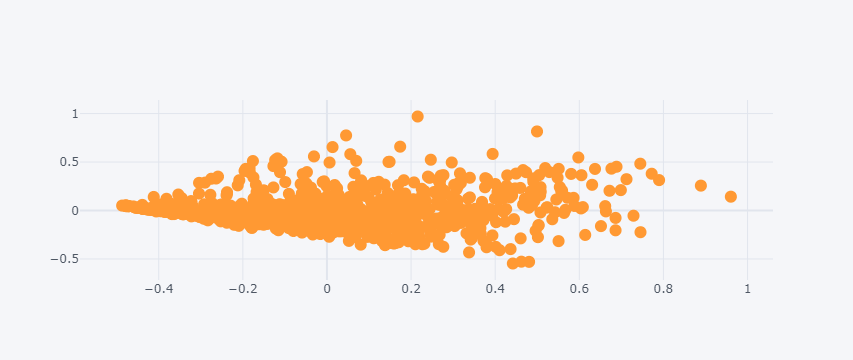

In [501]:
Xp.sample(1000).reset_index().iplot(kind = "scatter", mode="markers", x="p1", y="p2")

### T-SNE

In [502]:
tsne = TSNE(n_components=2)
Xts=X[best].sample(1000)
Xt = pd.DataFrame(data=tsne.fit_transform(Xts), columns=["d1", "d2"], index=Xts.index)

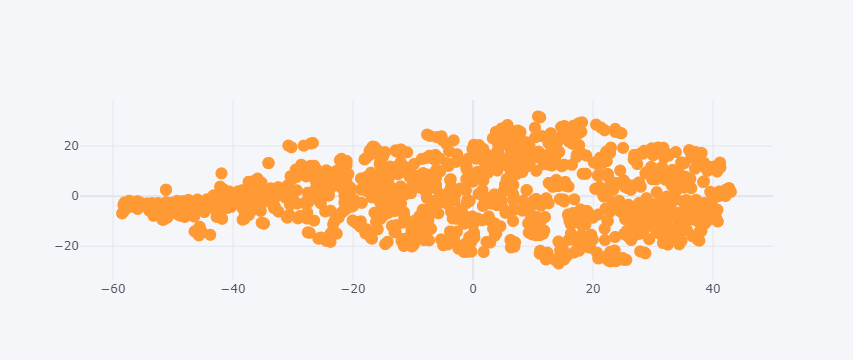

In [503]:
Xt.reset_index().iplot(kind = "scatter", mode="markers", x="d1", y="d2")

In [506]:
mds = MDS(n_components=2)
Xms=X[best].sample(1000)
Xm = pd.DataFrame(data=mds.fit_transform(Xms), columns=["m1", "m2"], index=Xms.index)

### MDS

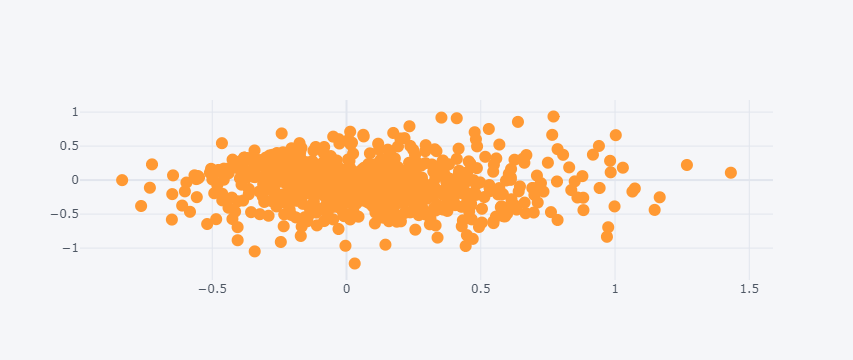

In [507]:
Xm.reset_index().iplot(kind = "scatter", mode="markers", x="m1", y="m2")

## Kmeans

### Cantidad adecuada de clusters

In [484]:
sse,db,slc = {}, {}, {}
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, max_iter=1000, random_state=10).fit(X[best])
    clusters = kmeans.labels_
    # Codo
    sse[k] = kmeans.inertia_
    # Davis Bouldin
    db[k] = davies_bouldin_score(X[best],clusters)
    # Silhouette
    slc[k] = silhouette_score(X[best],clusters)

#### Codo

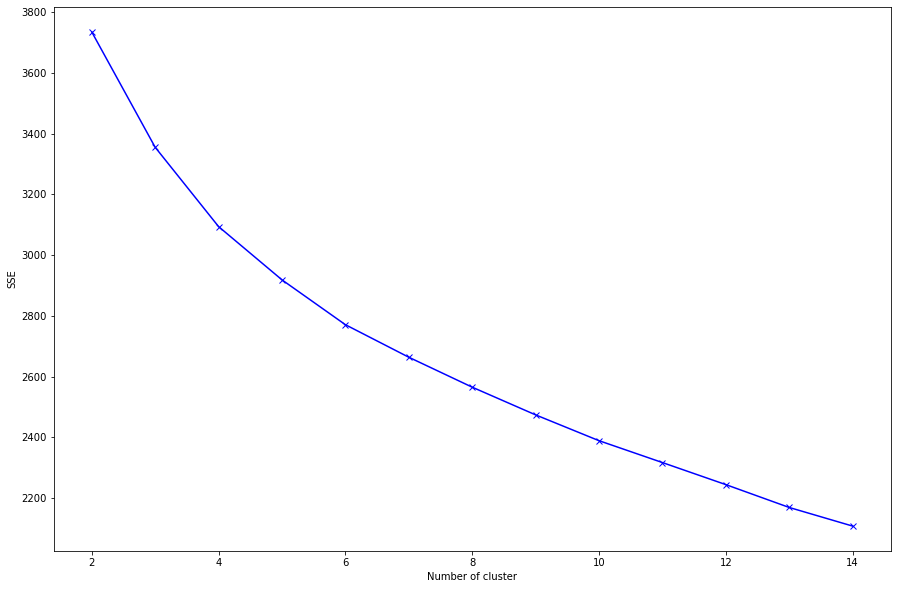

In [485]:
plt.figure(figsize=(15,10))
plt.plot(list(sse.keys()), list(sse.values()), "bx-")
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

#### Davies Bouldin

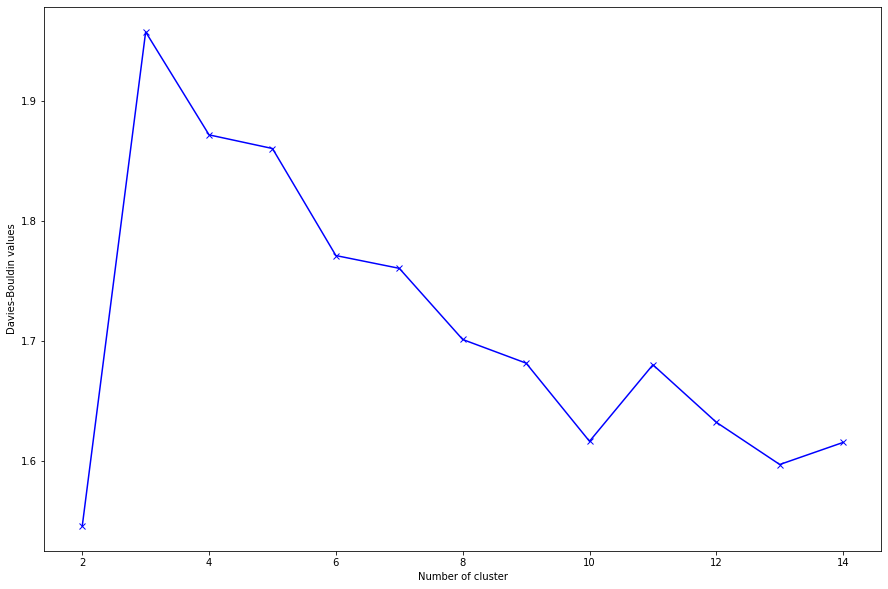

In [486]:
plt.figure(figsize=(15,10))
plt.plot(list(db.keys()), list(db.values()), "bx-")
plt.xlabel("Number of cluster")
plt.ylabel("Davies-Bouldin values")
plt.show()

#### Silouette

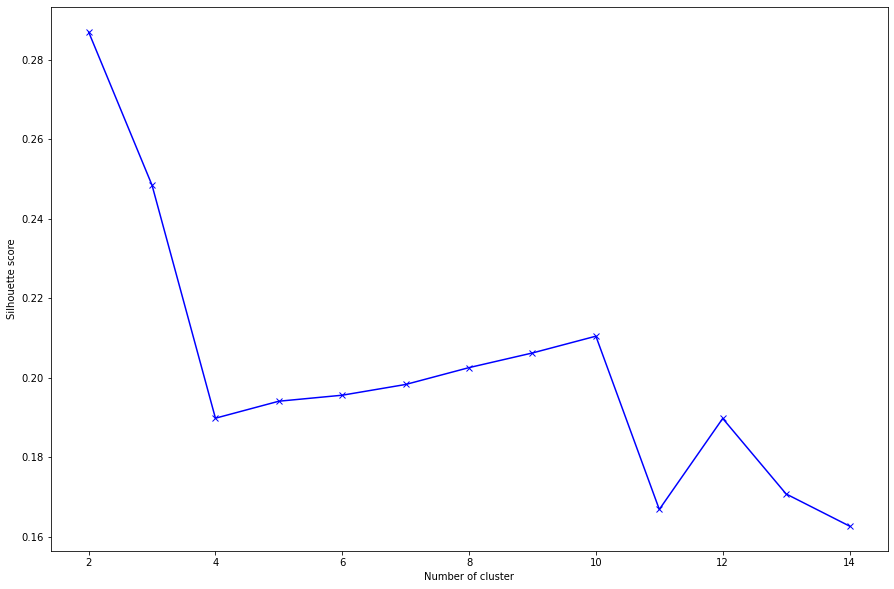

In [487]:
plt.figure(figsize=(15,10))
plt.plot(list(slc.keys()), list(slc.values()), "bx-")
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette score")
plt.show()

In [851]:
km = KMeans(n_clusters=5, random_state=10)

In [853]:
Xc=X[X['linea'].isin(cha['linea'])].reset_index(drop=True)

In [854]:
X=X[~X['linea'].isin(cha['linea'])].reset_index(drop=True)

In [856]:
km.fit(X[best])

KMeans(n_clusters=5, random_state=10)

In [857]:
km.predict(Xc[best])

array([3, 4, 2, 0, 4, 1, 1, 2, 2, 3, 0, 4, 1, 1, 2, 1, 0, 0, 1, 3, 2, 0,
       1, 1, 1, 4, 1, 1, 2, 0, 1, 0, 4, 4, 2, 0, 1, 4, 2, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 3, 1, 4, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 3, 1, 0, 1, 1, 1, 0, 0, 1, 4, 1, 1, 0, 0, 1, 0, 1, 4, 3,
       0, 4, 1, 1, 2, 2, 4, 1, 2, 1, 3, 1, 3, 1, 0, 0])

In [859]:
Xc['cl_km']=[str(cl) for cl in km.predict(Xc[best])]

In [861]:
Xc['cl_km']=Xc['cl_km'].replace({'0':'Consumos Medios','1':'Masivos',"2":'Alto Valor','3':'Mixtos','4':'Prime'})

In [865]:
Xc['cl_km'].value_counts()

Masivos            46
Consumos Medios    22
Alto Valor         16
Prime              12
Mixtos              8
Name: cl_km, dtype: int64

In [866]:
Xc['Cluster Consumos']=Xc['cl_km']

In [868]:
len(cha[cha['cl_km'].isna()])

21

In [870]:
cha=cha.merge(Xc[um+['Cluster Consumos']])

In [871]:
cha.to_csv('Gustos_Consumos.csv', index=False)

In [596]:
prep["cl_km"] = X['cl_km']= [str(cl) for cl in km.fit_predict(X[best])]

### Distribución

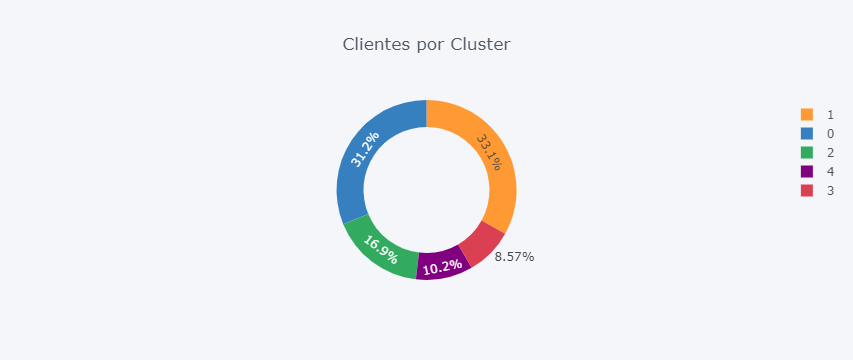

In [598]:
prep["cl_km"].value_counts(1).reset_index().iplot(kind="pie", labels='index',values='cl_km',hole=.7, title='Clientes por Cluster')

In [504]:
Xm=pd.concat([Xm,prep['cl_km']], axis=1,join='inner')
Xp=pd.concat([Xp,prep['cl_km']], axis=1,join='inner')
Xt=pd.concat([Xt,prep['cl_km']], axis=1,join='inner')

In [509]:
Xm=pd.concat([Xm,prep['cl_km']], axis=1,join='inner')

### Visualización Clusters

#### T-SNE

C:\Users\VDMG015\Anaconda3\lib\site-packages\cufflinks\plotlytools.py:807: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead

C:\Users\VDMG015\Anaconda3\lib\site-packages\cufflinks\plotlytools.py:810: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead



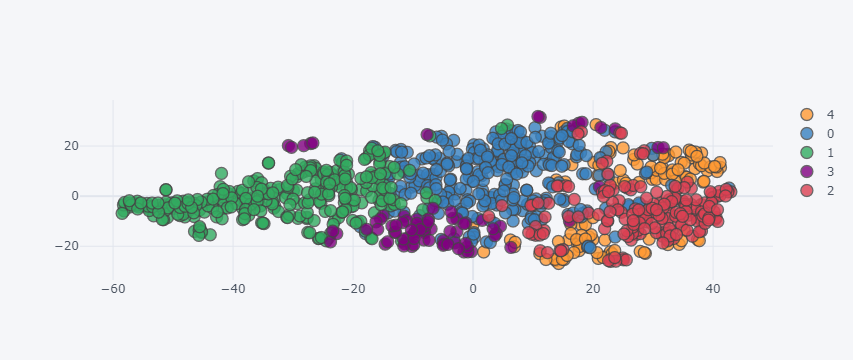

In [505]:
Xt.reset_index().iplot(kind = "scatter", mode="markers", x="d1", y="d2",categories="cl_km")

#### MDS

C:\Users\VDMG015\Anaconda3\lib\site-packages\cufflinks\plotlytools.py:807: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead

C:\Users\VDMG015\Anaconda3\lib\site-packages\cufflinks\plotlytools.py:810: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead



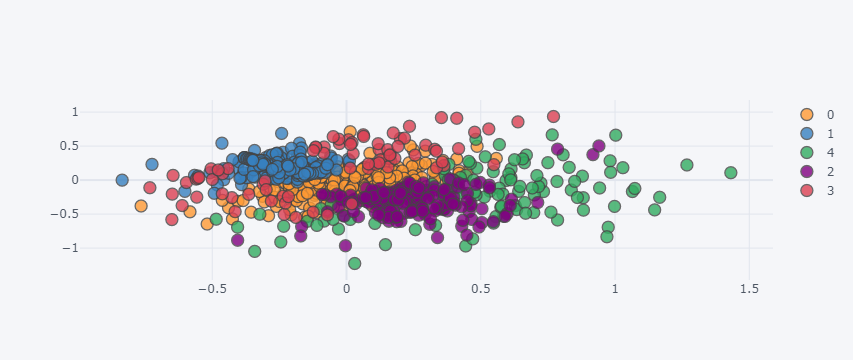

In [510]:
Xm.reset_index().iplot(kind = "scatter", mode="markers", x="m1", y="m2",categories="cl_km")

#### PCA

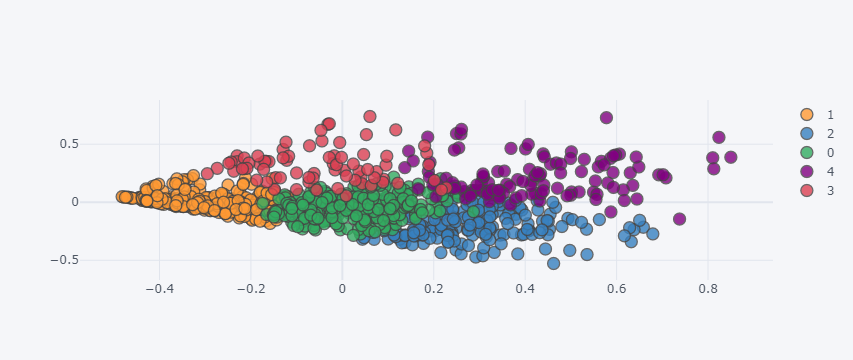

In [511]:
Xp.sample(1000).reset_index().iplot(kind = "scatter", mode="markers", x="p1", y="p2",categories="cl_km")

### Perfilamiento

#### Variables de Clusterización

In [512]:
prep=prep.rename(columns=dict(zip(best,best_sub)))

In [513]:
prep.groupby('cl_km')[best_sub].mean().style.background_gradient('PuBu')

#### Consumos de Datos

In [514]:
con=list(prep.filter(like='x_prom_conmb').columns)

In [515]:
prep.groupby('cl_km')[con].mean().style.background_gradient('PuBu')

In [516]:
prep.groupby('cl_km').mean().filter(like='upli').style.background_gradient('PuBu')

In [517]:
prep.groupby('cl_km').mean().filter(like='down').style.background_gradient('PuBu')

In [518]:
prep.groupby('cl_km').mean().filter(like='conn').style.background_gradient('PuBu')

#### Montos y Recargas

In [519]:
prep.groupby('cl_km').mean().filter(like='monto').style.background_gradient('PuBu')

In [520]:
prep.groupby('cl_km').mean().filter(like='rec').style.background_gradient('PuBu')

#### Voz

In [521]:
prep.groupby('cl_km').mean().filter(like='llam').style.background_gradient('PuBu')

In [522]:
prep.groupby('cl_km').mean().filter(like='seg').style.background_gradient('PuBu')

#### SMS

In [523]:
prep.groupby('cl_km').mean().filter(like='sms').style.background_gradient('PuBu')

#### Todas las variables

In [524]:
prep.groupby('cl_km').mean().style.background_gradient('PuBu')

#### Otros Atributos

In [525]:
aux=df[['linea','tiposuscripcion']].drop_duplicates()

In [526]:
aux=aux.merge(prep[um+['cl_km']], how='inner')

In [527]:
aux=aux.pivot_table(index='cl_km', columns='tiposuscripcion', values='linea',aggfunc='count', fill_value=0)

In [528]:
aux.div(aux.sum(axis=1),axis=0).style.background_gradient('PuBu')

In [529]:
aux1=df[['linea','plan']].drop_duplicates(keep='last')

In [530]:
aux1=aux1.merge(prep[um+['cl_km']], how='inner')

In [531]:
aux1=aux1[aux1['plan']!='(null)']

In [532]:
aux1[aux1['cl_km']=='0']['plan'].value_counts()

TMAX SL MX 1000 L       19
T MAX SL CC 1000 L      18
TEL MAX SL CC 1000 4    15
KIT A CREDITO DUMMY      9
TEL MAX SL 1000 L        8
TEL MAX SL CC 1000 8     8
T MAX SL CC 1000 4       6
T MAX SL CC 1000 8       6
TEL MAX SL CC 1000 L     6
TEL MAX SL 1000 4        5
TEL MAX SL 1000 8        4
TEL MAX SL 1000 24       4
MAX SIN LIM CC 15004     3
TEL MAX SL I 3000 4      3
TEL MAX SL CC 5000 4     2
M SIN LIM 9000 PL VI     2
T MAX SL CC 1500 L       2
MAX SL CC 2000-18 L      2
TEL MAX SL 1000 18       2
TM SIN LIMITE EMP 1      2
MAX SL CC 2000-18 8      2
MAX SIN LIM CC 15008     2
MAX SL CC 2000-18 4      2
T MAX SL CC I 1000 L     2
TMAX SL MX 1500 12       1
TEL MAX SL CC 3000 4     1
T MAX SL CC 1000 IL      1
TEL MAX SL 1500 4        1
TEL MAX SL 3000 4        1
T MAX SL CC I 5000 4     1
TEL MAX SL I 1000 24     1
TEL MAX SL CC 5000 8     1
TMAX SL MX 1000 24       1
TEL MAX SL 1500 L        1
TME D 1000 VD 18M        1
TEL MAX SL 1500 18       1
TMAX SL MX 2000 L        1
T

In [533]:
aux1[aux1['cl_km']=='1']['plan'].value_counts()

TEL MAX SL CC 1000 4    64
T MAX SL CC 1000 8      45
TEL MAX SL CC 1000 8    33
TEL MAX SL CC 1000 L    27
T MAX SL CC 1000 4      26
                        ..
TMAX SL MX 2000 18       1
MSLE CC 1000 DD 18       1
MAX 1000 VCC 24M         1
MSL MPP CC 2000-18 4     1
MAXC SL 1000 VCC 18M     1
Name: plan, Length: 138, dtype: int64

In [534]:
aux1[aux1['cl_km']=='2']['plan'].value_counts()

TMAX SL MX 1000 L       7
T MAX SL CC 1000 L      6
TEL MAX SL CC 1000 L    5
TEL MAX SL 1000 4       4
TEL MAX SL 1000 8       3
TEL MAX SL I 5000 4     3
TEL MAX SL 3000 4       3
MAX SIN LIM CC 15004    2
T MAX SL CC 1000 4      2
T MAX SL CC 1000 IL     2
M SIN LIM 7000 PL VI    2
KIT A CREDITO DUMMY     2
TMAX SL MX 1000 12      2
T MAX SL CC 1000 I4     1
TM SIN LIMIT 1000 L     1
MAX SL CC 2000-18 4     1
TEL MAX SL 1000 L       1
MAX SIN LIM 7000 PL     1
TEL MAX SL I 1000 L     1
TEL MAX SL I 3000 8     1
MAX SIN LIM CC 15008    1
TMSLE D 1500 VC 18M     1
M SIN LIM 8000 PL VI    1
MAX SL CC 2000-18 L     1
TEL MAX SL I 3000 L     1
TME C 1000 VC 24M       1
TEL MAX SL 1500 18      1
TEL MAX SL CC 2000 4    1
TEL MAX SL CC 1000 8    1
TM SL CC MPP 5000 4     1
MAX SL VI 2000-18 8     1
MAX SIN LIM 2000-184    1
TEL MAX SL CC 5000 4    1
TEL MAX SL 5000 4       1
MAX SIN LIM 2000-188    1
T MAX SL CC 1000 8      1
Name: plan, dtype: int64

In [535]:
aux1[aux1['cl_km']=='3']['plan'].value_counts()

TEL MAX SL CC 1000 4    89
T MAX SL CC 1000 8      78
T MAX SL CC 1000 4      69
TEL MAX SL CC 1000 8    62
MAX SL CC 2000-18 4     50
                        ..
TME A 1000 VC 12M        1
TEL MAX SL 1500 8        1
TMSLE A 3000 IVC 0M      1
TM SIN LIMIT 5000 12     1
TM SIN LIMIT 6000 24     1
Name: plan, Length: 220, dtype: int64

In [536]:
aux1[aux1['cl_km']=='4']['plan'].value_counts()

TEL MAX SL CC 1000 L    12
T MAX SL CC 1000 L       7
TEL MAX SL CC 1000 8     6
TEL MAX SL CC 3000 4     5
TMAX SL MX 1000 L        5
T MAX SL CC 1000 8       4
TEL MAX SL CC 1000 4     3
T MAX SL CC I 3000 4     3
TEL MAX SL 3000 4        3
MAX SIN LIM 7000 PL      3
T MAX SL CC 1000 4       3
MAX SL CC 2000-18 4      2
TEL MAX SL 1000 L        2
MAX SL 6500 PLATINO4     2
MAX SL CC 2000-18 8      2
TEL MAX SL CC 3000 8     2
TEL MAX SL CC 5000 4     2
TEL MAX SL 5000 4        2
TEL MAX SL 1000 4        2
KIT A CREDITO DUMMY      2
MAX SIN LIM 2000-184     1
TABLET 1000 MB CC 4      1
TMSLE B 3000 VC 18M      1
M SL CC 6500 PLAT 24     1
T MAX SL CC 1000 IL      1
TEL MAX SL 1500 8        1
TMSLE B 1500 VC 18M      1
TEL MAX SL 3000 L        1
MAX SIN LIM CC 15004     1
KIT A PLAZOS $814 12     1
TEL MAX SL I 3000 4      1
TMAX SL MX 2000 24       1
T MAX SL CC 1500 4       1
PLAN CONTACTO 1 3M       1
MSLE CC 1000 DD 24       1
MAX SL VI 2000-18 4      1
TMAX SL MX 1000 12       1
T

In [537]:
aux2=df[['linea','modeloeq']].drop_duplicates('linea', keep='last')
aux2=aux2.merge(prep[um+['cl_km']], how='inner')

In [538]:
aux2[aux2['cl_km']=='0']['modeloeq'].value_counts()

GALAXY J2 PRIME 2016 G532M    258
(null)                        218
MOTO E6 PLAY XT2029-1         108
MOTO E5 PLAY XT1920-18        103
Y5 2018 DRA-LX3                85
                             ... 
MOTO E6 XT2005-5                1
GALAXY J3 V 2018 J337V          1
MI NOTE 10                      1
GALAXY S10E G970U               1
ONE TOUCH POP C1 4015A          1
Name: modeloeq, Length: 1078, dtype: int64

In [539]:
aux2[aux2['cl_km']=='1']['modeloeq'].value_counts()

GALAXY J2 PRIME 2016 G532M     272
(null)                         227
Y5 2018 DRA-LX3                103
MOTO E5 PLAY XT1920-18          97
GALAXY GRAND PRIME VE G531H     93
                              ... 
9A M2006C3LI                     1
MAX X165G                        1
M4 EVOLUTION SS4456              1
Y9S STK-L22                      1
ONE TOUCH POP 4 5051A            1
Name: modeloeq, Length: 1265, dtype: int64

In [540]:
aux2[aux2['cl_km']=='2']['modeloeq'].value_counts()

P30 LITE MAR-LX3A             71
GALAXY J2 PRIME 2016 G532M    68
(null)                        61
MOTO E6 PLAY XT2029-1         60
Y9S STK-LX3                   59
                              ..
V330                           1
ONE TOUCH PIXI 4 5.5 5012G     1
GALAXY S8 G950U1               1
C15 RMX2195                    1
VIBE B A2016B30                1
Name: modeloeq, Length: 777, dtype: int64

In [541]:
aux2[aux2['cl_km']=='3']['modeloeq'].value_counts()

(null)                        60
GALAXY J2 PRIME 2016 G532M    47
Y9S STK-LX3                   40
Y9 PRIME 2019 STK-LX3         34
P30 LITE MAR-LX3A             31
                              ..
MOTO X4 XT1900-4               1
GALAXY S9 PLUS G965U           1
Y20S V2027                     1
P30 LITE MAR-LX3AM             1
ONE TOUCH 1011A                1
Name: modeloeq, Length: 568, dtype: int64

In [542]:
aux2[aux2['cl_km']=='4']['modeloeq'].value_counts()

(null)                        72
MOTO E6 PLAY XT2029-1         47
GALAXY J2 PRIME 2016 G532M    46
Y9 2019 JKM-LX3               43
Y9S STK-LX3                   42
                              ..
NOTE 7 M1901F7E                1
MATE 10 ALP-L09                1
IPHONE 4S CDMA                 1
IPHONE 5C CDMA                 1
S315                           1
Name: modeloeq, Length: 584, dtype: int64

In [543]:
aux3=df[['linea','tipoeq']].drop_duplicates('linea', keep='last')
aux3=aux3.merge(prep[um+['cl_km']], how='inner')
aux3=aux3.pivot_table(index='cl_km', columns='tipoeq', values='linea',aggfunc='count', fill_value=0)

In [544]:
aux3.div(aux3.sum(axis=1), axis=0).style.background_gradient('PuBu')

In [545]:
aux4=df[['linea','estatuslinea']].drop_duplicates('linea', keep='last')
aux4=aux4.merge(prep[um+['cl_km']], how='inner')

In [546]:
aux4=aux4.groupby(['cl_km','estatuslinea'])['linea'].count().unstack()

In [547]:
aux4.div(aux4.sum(axis=1), axis=0).style.background_gradient('PuBu')

## GMM

### Cantidad Adecuada de Clusters

In [548]:
sse,db,slc = {}, {}, {}
for k in range(2, 15):
    cluster = GaussianMixture(n_components=k, max_iter=1000, random_state=10).fit(X[best])
    clusters = cluster.predict(X[best])
    db[k] = davies_bouldin_score(X[best],clusters)
    slc[k] = silhouette_score(X[best],clusters)

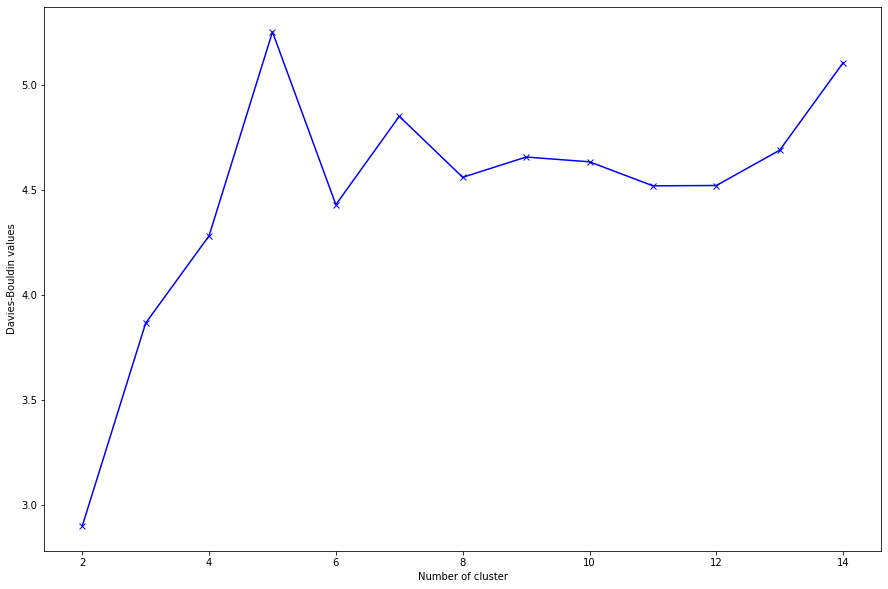

In [549]:
plt.figure(figsize=(15,10))
plt.plot(list(db.keys()), list(db.values()), "bx-")
plt.xlabel("Number of cluster")
plt.ylabel("Davies-Bouldin values")
plt.show()

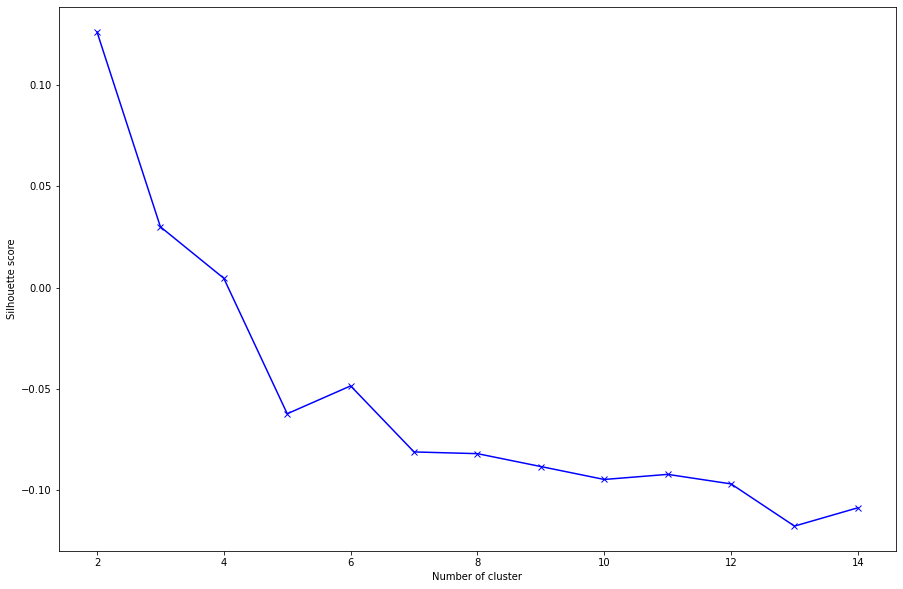

In [550]:
plt.figure(figsize=(15,10))
plt.plot(list(slc.keys()), list(slc.values()), "bx-")
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette score")
plt.show()

In [551]:
km = GaussianMixture(n_components=4, random_state=10)

In [552]:
prep["cl_gm"] = X['cl_gm']=[str(cl) for cl in km.fit_predict(X[best])]

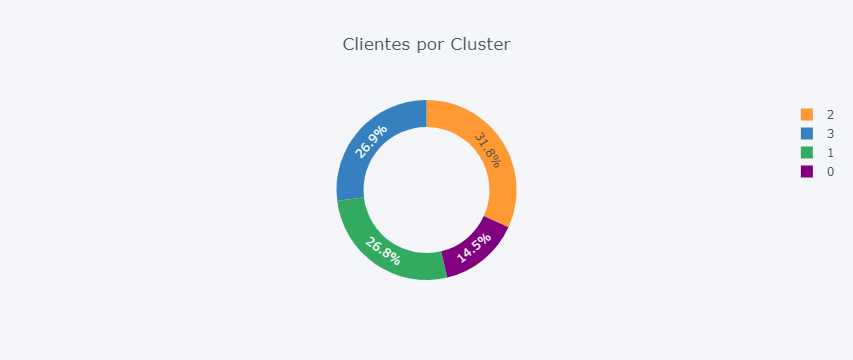

In [553]:
prep["cl_gm"].value_counts(1).reset_index().iplot(kind="pie", labels='index',values='cl_gm',hole=.7, title='Clientes por Cluster')

In [554]:
Xm=pd.concat([Xm,prep['cl_gm']], axis=1,join='inner')
Xp=pd.concat([Xp,prep['cl_gm']], axis=1,join='inner')
Xt=pd.concat([Xt,prep['cl_gm']], axis=1,join='inner')

C:\Users\VDMG015\Anaconda3\lib\site-packages\cufflinks\plotlytools.py:807: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead

C:\Users\VDMG015\Anaconda3\lib\site-packages\cufflinks\plotlytools.py:810: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead



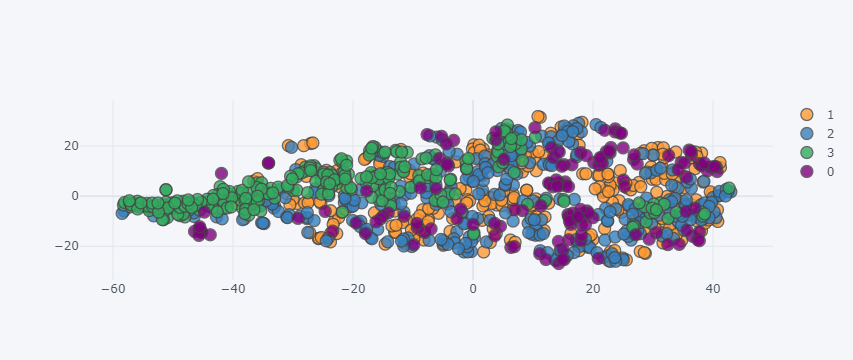

In [555]:
Xt.reset_index().iplot(kind = "scatter", mode="markers", x="d1", y="d2",categories="cl_gm")

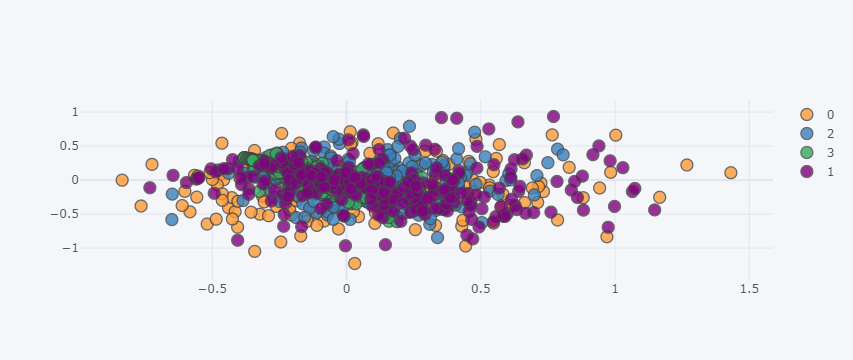

In [556]:
Xm.reset_index().iplot(kind = "scatter", mode="markers", x="m1", y="m2",categories="cl_gm")

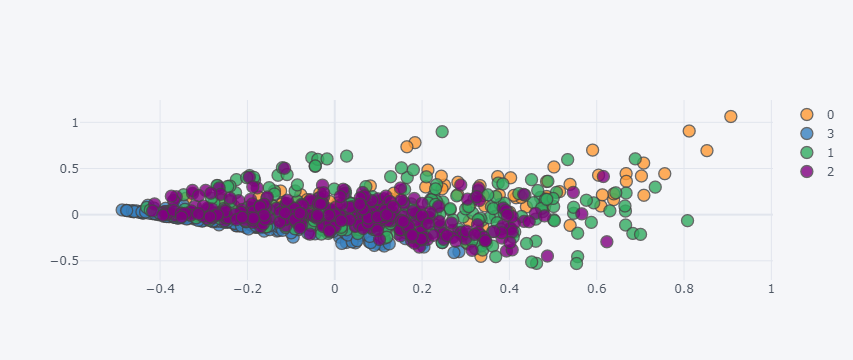

In [557]:
Xp.sample(1000).reset_index().iplot(kind = "scatter", mode="markers", x="p1", y="p2",categories="cl_gm")

### Perfilamiento

#### Variables de Clusterización

In [558]:
prep.groupby('cl_gm')[best_sub].mean().style.background_gradient('PuBu')

#### Consumos de Datos

In [559]:
con=list(prep.filter(like='x_prom_conmb').columns)

In [560]:
prep.groupby('cl_gm')[con].mean().style.background_gradient('PuBu')

In [561]:
prep.groupby('cl_gm').mean().filter(like='upli').style.background_gradient('PuBu')

In [562]:
prep.groupby('cl_gm').mean().filter(like='down').style.background_gradient('PuBu')

In [563]:
prep.groupby('cl_gm').mean().filter(like='conn').style.background_gradient('PuBu')

#### Montos y Recargas

In [564]:
prep.groupby('cl_gm').mean().filter(like='monto').style.background_gradient('PuBu')

In [565]:
prep.groupby('cl_gm').mean().filter(like='rec').style.background_gradient('PuBu')

#### Voz

In [566]:
prep.groupby('cl_gm').mean().filter(like='llam').style.background_gradient('PuBu')

In [567]:
prep.groupby('cl_gm').mean().filter(like='seg').style.background_gradient('PuBu')

#### SMS

In [568]:
prep.groupby('cl_gm').mean().filter(like='sms').style.background_gradient('PuBu')

#### Todas las variables

In [569]:
prep.groupby('cl_gm').mean().style.background_gradient('PuBu')

In [669]:
prep['cl_km']=prep['cl_km'].replace({'0':'Consumos Medios','1':'Masivos',"2":'Alto Valor','3':'Mixtos','4':'Prime'})

'0':'Consumos Medios','1':'Masivos',"2":'Alto Valor','3':'Mixtos','4':'Prime'

#### Otros Atributos

In [685]:
aux=df[['linea','tiposuscripcion']].drop_duplicates()

In [671]:
aux=aux.merge(prep[um+['cl_gm','cl_km']], how='inner')

In [672]:
aux['tiposuscripcion']=aux['tiposuscripcion'].replace('POSTPAGO','MIXTO')

In [673]:
aux.to_csv('Tipo_Suscripción.csv',index=False)

In [627]:
aux=aux.pivot_table(index='cl_gm', columns='tiposuscripcion', values='linea',aggfunc='count', fill_value=0)

In [628]:
aux.div(aux.sum(axis=1),axis=0).style.background_gradient('PuBu')

In [674]:
aux1=df[['linea','plan']].drop_duplicates(keep='last')

In [675]:
aux1=aux1.merge(prep[um+['cl_gm']], how='inner')

In [676]:
aux1=aux1[aux1['plan']!='(null)']

In [577]:
aux1[aux1['cl_gm']=='0']['plan'].value_counts()

T MAX SL CC 1000 8      30
TEL MAX SL CC 1000 8    25
T MAX SL CC 1000 L      22
TEL MAX SL CC 1000 L    21
TEL MAX SL CC 1000 4    20
                        ..
M SL CC 2000-18 VI L     1
KIT A PLAZOS $814 12     1
TABLET 1000 MB CC 4      1
MAXC SL 1000 VCC 12M     1
MSLE CC 1500 DD 18       1
Name: plan, Length: 105, dtype: int64

In [578]:
aux1[aux1['cl_gm']=='1']['plan'].value_counts()

TEL MAX SL CC 1000 4    78
T MAX SL CC 1000 4      53
T MAX SL CC 1000 8      51
TEL MAX SL CC 1000 L    41
MAX SL CC 2000-18 4     36
                        ..
TMSLE CC 1500 DD 12      1
T MAX SIN LIM 2000 8     1
MAX SL CC VI 70003       1
MAXSLE CC 3000CC4G24     1
TEL MAX SL CC 5000 8     1
Name: plan, Length: 209, dtype: int64

In [579]:
aux1[aux1['cl_gm']=='2']['plan'].value_counts()

TEL MAX SL CC 1000 4    60
T MAX SL CC 1000 8      45
TEL MAX SL CC 1000 8    42
TMAX SL MX 1000 L       37
TEL MAX SL CC 1000 L    30
                        ..
TELCEL PRO CC 200 18     1
TEL MAX SL 2000 8        1
MSLE CC 1500 DD 18       1
M SIN LIM 9000 PL VI     1
TM SL MX 5000 24         1
Name: plan, Length: 118, dtype: int64

In [580]:
aux1[aux1['cl_gm']=='3']['plan'].value_counts()

TEL MAX SL CC 1000 4    13
TMAX SL MX 1000 L       11
TEL MAX SL 1000 L       10
T MAX SL CC 1000 8       8
TEL MAX SL CC 1000 8     7
KIT A CREDITO DUMMY      7
TEL MAX SL 1000 18       7
MAX SL CC 2000-18 4      6
TEL MAX SL 1000 8        5
TEL MAX SL 1000 4        5
TEL MAX SL 1000 24       5
T MAX SL CC 1000 4       4
TMAX SL MX 1000 24       3
TEL MAX SL 3000 4        3
T MAX SL CC 1000 L       3
TMAX SL MX 1000 12       3
TEL MAX SL CC 1000 L     3
TEL MAX SL 1000 IL       2
MAX SL CC 2000-18 8      2
TM SIN LIMIT 1000 12     2
TME B 1000 VC 12M        1
M SL CC 6500 PLAT I4     1
TELCEL MAX 1000 CC L     1
MAX 1000 VCC 18M         1
MAX SL CC 2000-18 L      1
MAX 1000 VCC 24M         1
TM SIN LIMIT 1000 L      1
PL TELCEL MAX 1000 L     1
TEL MAX SL 2000 4        1
T MAX SL CC 1000 IL      1
T MAX SIN LIM 2000 4     1
TME C 1000 VC 18M        1
TME D 1000 VD 24M        1
MAX SL VI 2000-18 4      1
T MAX SL CC 1500 8       1
TEL MAX SL CC 5000 8     1
MAX SIN LIM 2000-184     1
T

In [677]:
aux2=df[['linea','modeloeq']].drop_duplicates('linea', keep='last')
aux2=aux2.merge(prep[um+['cl_gm','cl_km']], how='inner')

In [678]:
aux2=aux2[aux2['modeloeq']!='(null)']

In [679]:
aux2.to_csv('Modelo_Equipo.csv', index=False)

In [611]:
aux2[aux2['cl_gm']=='0']['modeloeq'].value_counts()

Y9S STK-LX3                   70
Y9 PRIME 2019 STK-LX3         61
GALAXY J2 PRIME 2016 G532M    60
P30 LITE MAR-LX3A             59
Y9 2019 JKM-LX3               52
                              ..
MOTO G 3RD GEN XT1543          1
GALAXY A01 CORE A013M DUOS     1
MAGNA Y90                      1
GR3                            1
K12 PLUS X420BMW               1
Name: modeloeq, Length: 692, dtype: int64

In [612]:
aux2[aux2['cl_gm']=='1']['modeloeq'].value_counts()

P30 LITE MAR-LX3A        117
Y9 2019 JKM-LX3          113
Y9S STK-LX3               96
Y9 PRIME 2019 STK-LX3     94
IPHONE 11 A2221           89
                        ... 
COSMO M2                   1
GALAXY S6 EDGE G925A       1
B6520L                     1
MOTO E4 XT1765PP           1
ILIUM M1                   1
Name: modeloeq, Length: 857, dtype: int64

In [613]:
aux2[aux2['cl_gm']=='2']['modeloeq'].value_counts()

GALAXY J2 PRIME 2016 G532M    298
MOTO E6 PLAY XT2029-1         132
MOTO E5 PLAY XT1920-18        105
GALAXY J4 CORE J410G           91
Y5 2018 DRA-LX3                90
                             ... 
BRIX                            1
GALAXY S10 PLUS G975U1          1
IPHONE 4                        1
ONE TOUCH 900A                  1
S315                            1
Name: modeloeq, Length: 1135, dtype: int64

In [614]:
aux2[aux2['cl_gm']=='3']['modeloeq'].value_counts()

GALAXY J2 PRIME 2016 G532M     254
Y5 2018 DRA-LX3                101
MOTO E5 PLAY XT1920-18          95
MOTO E6 PLAY XT2029-1           80
GALAXY GRAND PRIME VE G531H     68
                              ... 
GALAXY S9 G960U                  1
ONE FUSION+ XT2067-3             1
GALAXY A7 2016 A710M             1
LINK A500                        1
ONE TOUCH POP 4 5051A            1
Name: modeloeq, Length: 1170, dtype: int64

In [615]:
aux2

linea           modeloeq cl_gm
0      4421075467  IPHONE SE 2 A2296     1
1      4424750341    GALAXY S9 G9650     0
2      4641560807        ASCEND Y635     3
3      5533639357             X3 NFC     3
4      6862232289           1S 5024A     3
...           ...                ...   ...
23370  9999953352       9A M2006C3LG     1
23371  9999959194   NOTE 8 M1908C3JH     0
23372  9999977045  GALAXY A21S A217M     1
23373  9999982786  GALAXY A10S A107M     2
23374  9999985007    Y5 2018 DRA-LX3     3

[22737 rows x 3 columns]

In [680]:
aux3=df[['linea','tipoeq']].drop_duplicates('linea', keep='last')
aux3=aux3.merge(prep[um+['cl_gm','cl_km']], how='inner')


In [681]:
aux3.to_csv('Tipo_Equipo.csv', index=False)

In [ ]:
aux3=aux3.pivot_table(index='cl_gm', columns='tipoeq', values='linea',aggfunc='count', fill_value=0)

In [587]:
aux3.div(aux3.sum(axis=1), axis=0).style.background_gradient('PuBu')

In [682]:
aux4=df[['linea','estatuslinea']]
aux4=aux4.merge(prep[um+['cl_gm','cl_km']], how='inner')

In [683]:
aux4=aux4[~aux4['linea'].isin(aux4['linea'].value_counts().iloc[:7].index)]

In [684]:
aux4.to_csv('Estatus_Linea.csv', index=False)

In [648]:
aux4=aux4.groupby(['cl_gm','estatuslinea'])['linea'].count().unstack()

In [649]:
aux4.div(aux4.sum(axis=1), axis=0).style.background_gradient('PuBu')

# Exportación para Dashboard

In [686]:
prep.to_csv('Clustering_Prepago.csv',index=False)

In [687]:
tracking=pd.read_csv('TrackingTelefonico2021_.csv')

C:\Users\VDMG015\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning:

Columns (20,21,22,27,28,29,30,36,41,69,70,71,72,73,74,75,76,98,99,100,101,102,103,104,111,112,113,115,117,118,121,123,130,132,138,139,140,142,144,145,146,147,148,149,150,151,152,153,154,155,156,160,161,162,163,164,165,166,167,168,169,170,171,172,189,210,329,342,346) have mixed types.Specify dtype option on import or set low_memory=False.



In [688]:
tracking=tracking.rename(columns={'telefono':'linea'})

In [689]:
tracking.merge(prep[um+['cl_km','cl_gm']]).to_csv('Tracking_Cluster.csv',index=False)

In [690]:
avr=pd.read_csv('Tracking_Cluster.csv')

C:\Users\VDMG015\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning:

Columns (20,21,22,28,29,30,41,49,69,70,71,72,73,74,75,76,98,101,102,103,104,111,112,115,118,121,123,124,138,139,140,142,145,146,147,148,149,150,151,152,153,154,155,156,160,161,162,163,164,165,166,167,168,169,170,171,172,189,210,329,342,346) have mixed types.Specify dtype option on import or set low_memory=False.



In [691]:
avr.head()

Duration (in seconds) RecordedDate  LocationLatitude  LocationLongitude  \
0                    245   19/01/2021         19.419998         -99.166298   
1                    268   19/01/2021         19.497101         -99.114197   
2                    250   19/01/2021               NaN                NaN   
3                    125   20/01/2021         19.330200         -98.221298   
4                    296   20/01/2021         19.436005         -99.144600   

  EFECTIVA       SEXO       EDADEX  EDADEX_1_TEXT EDAD  \
0       Sí  Masculino  Edad exacta           60.0  NaN   
1       Sí   Femenino  Edad exacta           29.0  NaN   
2       Sí   Femenino  Edad exacta           63.0  NaN   
3       Sí   Femenino  Edad exacta           24.0  NaN   
4       Sí  Masculino  Edad exacta           58.0  NaN   

                                     D1       D2 D3        D4       D5  \
0                   Secundaria completa        1  0  No tiene        3   
1   Licenciatura / Universidad completa  2 o más  1  Sí tiene  4 o más   
2   Licenciatura / Universidad completa        1  1  Sí tiene        1   
3  Preparatoria / Bachillerato completa        1  1  No tiene        2   
4       Postgrado (Maestría, Doctorado)  2 o más  1  Sí tiene        2   

        D6        P1 P1_0_TEXT                P1_OTRAS P1_OTRAS_972_TEXT  \
0        2    TELCEL       NaN           MOVISTAR,AT&T               NaN   
1  4 o más  MOVISTAR       NaN         IUSACELL,TELCEL               NaN   
2        2    TELCEL       NaN         IUSACELL,UNEFON               NaN   
3        3    TELCEL       NaN                    AT&T               NaN   
4        2    TELCEL       NaN  IUSACELL,MOVISTAR,AT&T               NaN   

  P1_OTRAS_973_TEXT P1_OTRAS_974_TEXT P1_OTRAS_975_TEXT P1_OTRAS_971_TEXT  \
0               NaN               NaN               NaN               NaN   
1               NaN               NaN               NaN               NaN   
2               NaN               NaN               NaN               NaN   
3               NaN               NaN               NaN               NaN   
4               NaN               NaN               NaN               NaN   

         P2 P2_0_TEXT               P2_OTRAS P2_OTRAS_972_TEXT  \
0    TELCEL       NaN  NINGUNA / NO RECUERDA               NaN   
1  MOVISTAR       NaN        IUSACELL,TELCEL               NaN   
2      AT&T       NaN               MOVISTAR               NaN   
3    TELCEL       NaN                   AT&T               NaN   
4      AT&T       NaN  TELCEL,MOVISTAR,OTRA1               NaN   

  P2_OTRAS_973_TEXT P2_OTRAS_974_TEXT P2_OTRAS_975_TEXT P2_OTRAS_971_TEXT  \
0               NaN               NaN               NaN               NaN   
1               NaN               NaN               NaN               NaN   
2               NaN               NaN               NaN               NaN   
3               NaN               NaN               NaN               NaN   
4               NaN               NaN               NaN              IZZI   

        P3      P5       P6                     P7  P8  P8A  P8A_3_TEXT  \
0   TELCEL  TELCEL  Prepago          Más de 5 años  No  NaN         NaN   
1   TELCEL  TELCEL  Prepago          Más de 5 años  No  NaN         NaN   
2  NINGUNA  TELCEL  Prepago          Más de 5 años  No  NaN         NaN   
3     AT&T  TELCEL  Prepago  Más de 1 hasta 2 años  No  NaN         NaN   
4   TELCEL  TELCEL  Prepago          Más de 5 años  Sí  1.0         NaN   

       P9_1 P9_1_0_TEXT P9_2 P9_2_0_TEXT                           P11_1  \
0       NaN         NaN  NaN         NaN                             NaN   
1       NaN         NaN  NaN         NaN                             NaN   
2       NaN         NaN  NaN         NaN                             NaN   
3       NaN         NaN  NaN         NaN                             NaN   
4  MOVISTAR         NaN  NaN         NaN  PREPAGO (A través de recargas)   

  P11_2 P7A1 P7A2 P7A3 P7A5  P7F  P7G  P7E  P7B P7B_

In [663]:
avr.shape

(23436, 350)

In [666]:
avr.drop_duplicates()

Duration (in seconds) RecordedDate  LocationLatitude  \
0                        245   19/01/2021         19.419998   
1                        268   19/01/2021         19.497101   
2                        250   19/01/2021               NaN   
3                        125   20/01/2021         19.330200   
4                        296   20/01/2021         19.436005   
...                      ...          ...               ...   
23431                    787   03/06/2021               NaN   
23432                    948   03/06/2021         19.522095   
23433                    724   03/06/2021         19.378296   
23434                    669   03/06/2021               NaN   
23435                    559   03/06/2021         19.541199   

       LocationLongitude EFECTIVA       SEXO       EDADEX  EDADEX_1_TEXT EDAD  \
0             -99.166298       Sí  Masculino  Edad exacta           60.0  NaN   
1             -99.114197       Sí   Femenino  Edad exacta           29.0  NaN   
2                    NaN       Sí   Femenino  Edad exacta           63.0  NaN   
3             -98.221298       Sí   Femenino  Edad exacta           24.0  NaN   
4             -99.144600       Sí  Masculino  Edad exacta           58.0  NaN   
...                  ...      ...        ...          ...            ...  ...   
23431                NaN       Sí  Masculino  Edad exacta           50.0  NaN   
23432         -99.157600       Sí   Femenino  Edad exacta           58.0  NaN   
23433         -99.162102       Sí  Masculino  Edad exacta           30.0  NaN   
23434                NaN       Sí   Femenino  Edad exacta           47.0  NaN   
23435         -99.166603       Sí   Femenino  Edad exacta           21.0  NaN   

                                          D1       D2       D3        D4  \
0                        Secundaria completa        1        0  No tiene   
1        Licenciatura / Universidad completa  2 o más        1  Sí tiene   
2        Licenciatura / Universidad completa        1        1  Sí tiene   
3       Preparatoria / Bachillerato completa        1        1  No tiene   
4            Postgrado (Maestría, Doctorado)  2 o más        1  Sí tiene   
...                                      ...      ...      ...       ...   
23431                    Secundaria completa        1        0  No tiene   
23432    Licenciatura / Universidad completa  2 o más  2 o más  Sí tiene   
23433   Preparatoria / Bachillerato completa        1  2 o más  No tiene   
23434                      Primaria completa        1        0  No tiene   
23435  Licenciatura / Universidad incompleta  2 o más        0  No tiene   

            D5       D6        P1 P1_0_TEXT                P1_OTRAS  \
0            3        2    TELCEL       NaN           MOVISTAR,AT&T   
1      4 o más  4 o más  MOVISTAR       NaN         IUSACELL,TELCEL   
2            1        2    TELCEL       NaN         IUSACELL,UNEFON   
3            2        3    TELCEL       NaN                    AT&T   
4            2        2    TELCEL       NaN  IUSACELL,MOVISTAR,AT&T   
...        ...      ...       ...       ...                     ...   
23431        2        2    TELCEL       NaN                MOVISTAR   
23432        2        3  MOVISTAR       NaN             TELCEL,AT&T   
23433        1        2      AT&T       NaN         TELCEL,MOVISTAR   
23434        2        2    TELCEL       NaN    MOVISTAR,UNEFON,AT&T   
23435  4 o más  4 o más    TELCEL       NaN    MOVISTAR,UNEFON,AT&T   

      P1_OTRAS_972_TEXT P1_OTRAS_973_TEXT P1_OTRAS_974_TEXT P1_OTRAS_975_TEXT  \
0                   NaN               NaN               NaN               NaN   
1                   NaN               NaN               NaN               NaN   
2                   NaN               NaN               NaN               NaN   
3                   NaN               NaN               NaN               NaN   
4                   NaN               NaN               NaN               NaN   
...                 ...  

In [667]:
prep

x_prom_conmbredsoc  x_min_conmbredsoc  x_max_conmbredsoc  \
0               14.664199           0.000000          59.877344   
1              159.076522           0.005066        1053.184002   
2              200.755765           0.000000         801.975670   
3             4446.361694         983.289210       23398.064393   
4             5005.039904        1324.990021       13022.624950   
...                   ...                ...                ...   
23370         1808.034037         295.837574        3237.033801   
23371           17.628374           0.066879          64.041372   
23372         3174.029392           1.052726       12816.749206   
23373          177.572237           4.300227         508.931478   
23374           41.782713           0.000000         519.644919   

       x_cv_conmbredsoc    WhatsApp  x_min_conmbwhatsapp  x_max_conmbwhatsapp  \
0              1.283162   17.559745             0.000000           227.985389   
1              1.503713   19.241473             0.005501            59.255259   
2              1.165416   27.189374             0.000000           129.833439   
3              1.227630  291.239694            37.018111          1123.439114   
4              0.695796  397.681172            89.076136           871.871883   
...                 ...         ...                  ...                  ...   
23370          0.479072  160.898191            49.389869           403.348425   
23371          1.005914   17.291791             2.326799            60.956499   
23372          1.428907  138.332481             0.013111          1066.783118   
23373          0.953802   55.736447             0.844845           203.670109   
23374          2.486185    4.164582             0.000000            24.387870   

       x_cv_conmbwhatsapp      Uber  x_max_conmbuber     Youtube  \
0                2.498326  0.000000         0.000000   65.114083   
1                0.935802  0.000000         0.000000   15.796488   
2                1.283805  0.000000         0.000000  101.122863   
3                0.967523  9.573918        57.212332   75.348166   
4                0.604021  0.000000         0.000000  501.896827   
...                   ...       ...              ...         ...   
23370            0.600767  0.710741         6.043519   16.551017   
23371            0.876855  0.000043         0.000610    4.068939   
23372            1.763282  0.000000         0.000000   16.809840   
23373            0.910532  0.000000         0.000000   46.050603   
23374            1.644584  0.000000         0.000000   64.820600   

       x_min_conmbyoutube  x_max_conmbyoutube  x_cv_conmbyoutube    Instagram  \
0                0.000000          654.393518           2.194204    77.360134   
1                0.000000          132.688164           1.954743     6.733181   
2                0.000000          592.715933           1.718325     0.004606   
3                1.080600          248.266821           1.051054   276.556365   
4               37.172441         1909.891708           1.121562     6.343874   
...                   ...                 ...                ...          ...   
23370            0.077946           96.085138           1.464290     6.305840   
23371            0.000000           41.620285           2.104242     1.162199   
23372            0.000000          120.084020           1.733212  1660.509673   
23373            0.201283          235.856963           1.418992     0.604263   
23374            0.000000          650.516419           2.349544     0.457134   

       x_min_conmbinstagr  x_max_conmbinstagr  x_cv_conmbinstagr     MB Otros  \
0                0.000000          516.678273           1.589979   455.225170   
1                0.000000          125.047146           3.084999    50.632177   
2                0.000000            0.082717           3.062487    69.659542   
3               19.465894         1346.004521           1.162925  1634.162656   
4                0.000000         

In [665]:
avr['EDAD_F']

0        60
1        29
2        63
3        24
4        58
         ..
23431    50
23432    58
23433    30
23434    47
23435    21
Name: EDAD_F, Length: 23436, dtype: int64

In [651]:
tracking

Duration (in seconds) RecordedDate  LocationLatitude  \
0                        245   19/01/2021         19.419998   
1                        271   19/01/2021               NaN   
2                        233   19/01/2021               NaN   
3                        268   19/01/2021         19.497101   
4                        338   19/01/2021         19.497101   
...                      ...          ...               ...   
63925                    539   03/06/2021               NaN   
63926                    531   03/06/2021         19.435394   
63927                    633   03/06/2021               NaN   
63928                    790   03/06/2021               NaN   
63929                    559   03/06/2021         19.541199   

       LocationLongitude EFECTIVA       SEXO       EDADEX  EDADEX_1_TEXT EDAD  \
0             -99.166298       Sí  Masculino  Edad exacta           60.0  NaN   
1                    NaN       Sí  Masculino  Edad exacta           50.0  NaN   
2                    NaN       Sí  Masculino  Edad exacta           36.0  NaN   
3             -99.114197       Sí   Femenino  Edad exacta           29.0  NaN   
4             -99.114197       Sí   Femenino  Edad exacta           18.0  NaN   
...                  ...      ...        ...          ...            ...  ...   
63925                NaN       Sí   Femenino  Edad exacta           36.0  NaN   
63926         -99.142700       Sí  Masculino  Edad exacta           47.0  NaN   
63927                NaN       Sí  Masculino  Edad exacta           45.0  NaN   
63928                NaN       Sí   Femenino  Edad exacta           38.0  NaN   
63929         -99.166603       Sí   Femenino  Edad exacta           21.0  NaN   

                                          D1       D2       D3        D4  \
0                        Secundaria completa        1        0  No tiene   
1        Licenciatura / Universidad completa  2 o más        1  Sí tiene   
2       Preparatoria / Bachillerato completa        1        0  Sí tiene   
3        Licenciatura / Universidad completa  2 o más        1  Sí tiene   
4       Preparatoria / Bachillerato completa  2 o más  2 o más  Sí tiene   
...                                      ...      ...      ...       ...   
63925    Licenciatura / Universidad completa        1        1  Sí tiene   
63926    Licenciatura / Universidad completa        1        1  Sí tiene   
63927   Preparatoria / Bachillerato completa  2 o más  2 o más  Sí tiene   
63928                      Primaria completa        0        0  No tiene   
63929  Licenciatura / Universidad incompleta  2 o más        0  No tiene   

            D5       D6        P1 P1_0_TEXT              P1_OTRAS  \
0            3        2    TELCEL       NaN         MOVISTAR,AT&T   
1            1        2    TELCEL       NaN  MOVISTAR,UNEFON,AT&T   
2            1        2    TELCEL       NaN         MOVISTAR,AT&T   
3      4 o más  4 o más  MOVISTAR       NaN       IUSACELL,TELCEL   
4            2        3      AT&T       NaN       MOVISTAR,UNEFON   
...        ...      ...       ...       ...                   ...   
63925        2        1    TELCEL       NaN         MOVISTAR,AT&T   
63926        2        2    TELCEL       NaN         MOVISTAR,AT&T   
63927        1  4 o más    TELCEL       NaN         MOVISTAR,AT&T   
63928        1        2    TELCEL       NaN       MOVISTAR,UNEFON   
63929  4 o más  4 o más    TELCEL       NaN  MOVISTAR,UNEFON,AT&T   

      P1_OTRAS_972_TEXT P1_OTRAS_973_TEXT P1_OTRAS_974_TEXT P1_OTRAS_975_TEXT  \
0                   NaN               NaN               NaN               NaN   
1                   NaN               NaN               NaN               NaN   
2                   NaN               NaN               NaN               NaN   
3                   NaN               NaN               NaN               NaN   
4                   NaN               NaN               NaN               NaN   
...                 ...               ...        

In [703]:
cons=pd.read_csv('Datos_sep/datos_charly.csv', sep='\t')
mon=pd.read_csv('Montos/Montos_charly.csv', sep='\t')
sms=pd.read_csv('SMS/SMS_charly.csv', sep='\t')
voz=pd.read_csv('Voz/Voz_charly.csv', sep='\t')
dat=pd.read_csv('Datos/Datos_charly.csv', sep='\t')

In [704]:
um=['linea','mesproceso']

In [705]:
cruzar = lambda x,y:pd.merge(x,y,on=um,how='outer')

In [706]:
l=[cons,mon,sms,voz,dat]

In [707]:
df=reduce(cruzar,l)

In [708]:
df=df[df['tiposuscripcion'].notna()].reset_index(drop=True)

In [709]:
df.drop_duplicates(inplace=True)

In [710]:
df.columns

Index(['linea', 'mesproceso', 'estatuslinea', 'modeloeq', 'tiposuscripcion',
       'conmbredsoc', 'conmbwhatsapp', 'conmbuber', 'conmbyoutube',
       'conmbinstagr', 'conmbotros', 'conmb4g', 'conmb3g', 'conmb2g',
       'conmbotrostec', 'conmbsnapchat', 'tipoeq', 'monto', 'monto_prom',
       'monto_min', 'monto_max', 'recargas', 'sms_in', 'sms_out', 'cv_sms_in',
       'cv_sms_out', 'llamadas_in', 'llamadas_out', 'segundos_in',
       'segundos_out', 'rounded_mous_in', 'rounded_mous_out',
       'tiempo_respuesta_in', 'tiempo_respuesta_out', 'rounded_tot_mous_in',
       'rounded_tot_mous_out', 'cv_segundos_in', 'cv_segundos_out',
       'connections', 'downlink', 'uplink', 'cv_connections', 'cv_downlink',
       'cv_uplink'],
      dtype='object')

In [711]:
df=df.sort_values(['mesproceso','linea'])

In [712]:
df[['conmbredsoc', 'conmbwhatsapp', 'conmbuber',
       'conmbyoutube', 'conmbinstagr', 'conmbotros', 'conmb4g', 'conmb3g',
       'conmb2g', 'conmbotrostec', 'conmbsnapchat','monto',
       'monto_min', 'monto_max', 'recargas', 'sms_out', 'llamadas_out',
       'segundos_out',
       'connections', 'downlink', 'uplink']]=df[['conmbredsoc', 'conmbwhatsapp', 'conmbuber',
       'conmbyoutube', 'conmbinstagr', 'conmbotros', 'conmb4g', 'conmb3g',
       'conmb2g', 'conmbotrostec', 'conmbsnapchat','monto',
       'monto_min', 'monto_max', 'recargas', 'sms_out', 'llamadas_out',
       'segundos_out',
       'connections', 'downlink', 'uplink']].replace('(null)',0).astype(float)

In [713]:
#Mínimo, Máximo, Suma, Coeficiente de Variación 
l=[]
for i in ['conmbredsoc', 'conmbwhatsapp', 'conmbuber',
       'conmbyoutube', 'conmbinstagr', 'conmbotros', 'conmb4g', 'conmb3g',
       'conmb2g', 'conmbotrostec', 'conmbsnapchat','monto',
       'monto_min', 'monto_max', 'recargas', 'sms_out', 'llamadas_out',
       'segundos_out',
       'connections', 'downlink', 'uplink']:
        piv = df.pivot_table(index='linea',
                              columns='mesproceso',
                              values=i,
                              aggfunc='sum') 
        piv[f'x_prom_'+i] = piv.mean(axis=1)
        piv[f'x_min_'+i] = piv.min(axis=1)
        piv[f'x_max_'+i] = piv.max(axis=1)
        piv[f'x_cv_'+i] =piv.std(axis=1)/piv.mean(axis=1)
        l.append(piv.filter(like='x_'))


In [714]:
aux = reduce(lambda x,y:pd.merge(x,
                                  y,
                                  left_index=True,
                                  right_index=True,
                                  how='outer'),l).reset_index()

In [715]:
aux=aux.replace(np.inf,np.nan)

In [716]:
miss = 1 - aux.describe().T[['count']]/len(aux)
miss = miss.sort_values(by='count',ascending=False)
miss

count
mesproceso                  
x_cv_conmbotrostec  0.778846
x_cv_conmbuber      0.394231
x_cv_conmbsnapchat  0.336538
x_cv_conmb2g        0.221154
x_cv_conmb4g        0.038462
...                      ...
x_prom_conmb3g      0.000000
x_max_conmb4g       0.000000
x_min_conmb4g       0.000000
x_prom_conmb4g      0.000000
x_cv_uplink         0.000000

[85 rows x 1 columns]

In [717]:
aux=aux.drop(miss[miss['count']>.2].index, axis=1)

### Input Mediana

In [718]:
from sklearn.impute import SimpleImputer

In [719]:
varc=[x for x in aux.filter(like='x_').columns]
um=['linea']

In [720]:
im = SimpleImputer(strategy='median')
im.fit(aux[varc])

SimpleImputer(strategy='median')

In [721]:
Xi = pd.DataFrame(im.transform(aux[varc]),columns=varc)

In [722]:
Xi=pd.concat([Xi,aux['linea']],axis=1)

In [723]:
Xi.dropna().shape,Xi.shape

((104, 81), (104, 81))

### Estadígrafo de KS

In [724]:
from scipy.stats import ks_2samp,kruskal

In [725]:
ks = pd.DataFrame(map(lambda v:(v,ks_2samp(Xi[v],aux[v].dropna()).statistic),varc),
             columns=['variable','ks'])
rotas = ks.loc[ks['ks']>0.1]['variable'].tolist()

In [726]:
ks.head()

variable   ks
0    x_prom_conmbredsoc  0.0
1     x_min_conmbredsoc  0.0
2     x_max_conmbredsoc  0.0
3      x_cv_conmbredsoc  0.0
4  x_prom_conmbwhatsapp  0.0

In [727]:
rotas

[]

In [728]:
cuenta=df['linea'].value_counts().reset_index()

In [729]:
cuenta.columns=['linea','meses_registro']

In [730]:
Xi=Xi.merge(cuenta, how='left', on='linea')

In [731]:
Xi

x_prom_conmbredsoc  x_min_conmbredsoc  x_max_conmbredsoc  \
0           1719.525406         939.733697        2819.914723   
1           4425.466894         969.679331       11765.822577   
2            162.661507          12.381692         426.262342   
3            332.202586          20.467671        1536.384915   
4           8656.806089          21.851363       15152.522767   
..                  ...                ...                ...   
99          3700.644683           0.000000       16824.278537   
100         1242.218007           0.000000        4207.500229   
101          322.560971           0.000000        2080.426199   
102            4.864250           0.000000          24.635152   
103         1293.152584          23.096833        7951.508319   

     x_cv_conmbredsoc  x_prom_conmbwhatsapp  x_min_conmbwhatsapp  \
0            0.428112             29.417404            18.472293   
1            0.722019           1146.107876           485.937002   
2            0.707989             44.947817             4.011771   
3            1.241301            126.849071             2.974394   
4            0.529507            717.847419             3.868680   
..                ...                   ...                  ...   
99           1.369897            140.599795             0.000000   
100          1.166903             61.461977             0.000000   
101          1.689912              5.398434             0.000000   
102          1.626966             56.091233             0.000000   
103          1.616255            117.494818             0.470841   

     x_max_conmbwhatsapp  x_cv_conmbwhatsapp  x_prom_conmbuber  \
0              44.412354            0.398754        504.051002   
1            2619.022912            0.573264         10.359268   
2             101.559380            0.656956          2.219400   
3             647.700333            1.520814          0.153489   
4            1072.441423            0.453256          0.001081   
..                   ...                 ...               ...   
99            441.447133            0.958275          0.000000   
100           148.687558            0.902128          0.000000   
101            38.330007            1.698528          1.481016   
102           263.132040            1.556992          0.004734   
103           307.576088            0.981913          0.000000   

     x_min_conmbuber  x_max_conmbuber  x_prom_conmbyoutube  \
0                0.0      1214.507596           121.385443   
1                0.0        70.082499           134.623370   
2                0.0        19.981142            81.714776   
3                0.0         1.329323           172.160915   
4                0.0         0.015130           226.840399   
..               ...              ...                  ...   
99               0.0         0.000000           251.158007   
100              0.0         0.000000           612.113529   
101              0.0        10.283455             3.129906   
102              0.0         0.056812            15.998799   
103              0.0         0.000000            52.002997   

     x_min_conmbyoutube  x_max_conmbyoutube  x_cv_conmbyoutube  \
0             35.436899          256.933359           0.706000   
1              1.464024          669.857828           1.248815   
2              1.178839          280.425761           1.014770   
3              2.030177          539.450595           0.995702   
4              5.041851         1183.416999           1.390126   
..                  ...                 ...                ...   
99             0.000000         1162.590907           1.437699   
100            0.000000         1505.382609           0.889732   
101            0.000000           16.851284           1.501523   
102            0.000000           74.735936           1.526741   
103            1.455727          164.869812           0.924306   

     x_prom_conmbinstagr  x_min_conmbinstagr  x_max_conmbinstagr  \
0       

In [732]:
Xi.reset_index(drop=True,inplace=True)

In [734]:
mm=MinMaxScaler()

In [735]:
mm.fit(Xi[varc])

MinMaxScaler()

In [736]:
X1=pd.DataFrame(mm.transform(Xi[varc]), columns=varc)

In [737]:
X1

x_prom_conmbredsoc  x_min_conmbredsoc  x_max_conmbredsoc  \
0           1719.525406         939.733697        2819.914723   
1           4425.466894         969.679331       11765.822577   
2            162.661507          12.381692         426.262342   
3            332.202586          20.467671        1536.384915   
4           8656.806089          21.851363       15152.522767   
..                  ...                ...                ...   
99          3700.644683           0.000000       16824.278537   
100         1242.218007           0.000000        4207.500229   
101          322.560971           0.000000        2080.426199   
102            4.864250           0.000000          24.635152   
103         1293.152584          23.096833        7951.508319   

     x_cv_conmbredsoc  x_prom_conmbwhatsapp  x_min_conmbwhatsapp  \
0            0.428112             29.417404            18.472293   
1            0.722019           1146.107876           485.937002   
2            0.707989             44.947817             4.011771   
3            1.241301            126.849071             2.974394   
4            0.529507            717.847419             3.868680   
..                ...                   ...                  ...   
99           1.369897            140.599795             0.000000   
100          1.166903             61.461977             0.000000   
101          1.689912              5.398434             0.000000   
102          1.626966             56.091233             0.000000   
103          1.616255            117.494818             0.470841   

     x_max_conmbwhatsapp  x_cv_conmbwhatsapp  x_prom_conmbuber  \
0              44.412354            0.398754        504.051002   
1            2619.022912            0.573264         10.359268   
2             101.559380            0.656956          2.219400   
3             647.700333            1.520814          0.153489   
4            1072.441423            0.453256          0.001081   
..                   ...                 ...               ...   
99            441.447133            0.958275          0.000000   
100           148.687558            0.902128          0.000000   
101            38.330007            1.698528          1.481016   
102           263.132040            1.556992          0.004734   
103           307.576088            0.981913          0.000000   

     x_min_conmbuber  x_max_conmbuber  x_prom_conmbyoutube  \
0                0.0      1214.507596           121.385443   
1                0.0        70.082499           134.623370   
2                0.0        19.981142            81.714776   
3                0.0         1.329323           172.160915   
4                0.0         0.015130           226.840399   
..               ...              ...                  ...   
99               0.0         0.000000           251.158007   
100              0.0         0.000000           612.113529   
101              0.0        10.283455             3.129906   
102              0.0         0.056812            15.998799   
103              0.0         0.000000            52.002997   

     x_min_conmbyoutube  x_max_conmbyoutube  x_cv_conmbyoutube  \
0             35.436899          256.933359           0.706000   
1              1.464024          669.857828           1.248815   
2              1.178839          280.425761           1.014770   
3              2.030177          539.450595           0.995702   
4              5.041851         1183.416999           1.390126   
..                  ...                 ...                ...   
99             0.000000         1162.590907           1.437699   
100            0.000000         1505.382609           0.889732   
101            0.000000           16.851284           1.501523   
102            0.000000           74.735936           1.526741   
103            1.455727          164.869812           0.924306   

     x_prom_conmbinstagr  x_min_conmbinstagr  x_max_conmbinstagr  \
0       

In [738]:
X1

x_prom_conmbredsoc  x_min_conmbredsoc  x_max_conmbredsoc  \
0              0.111359           0.133744           0.070055   
1              0.286626           0.138006           0.292462   
2              0.010519           0.001762           0.010546   
3              0.021500           0.002913           0.038145   
4              0.560696           0.003110           0.376659   
..                  ...                ...                ...   
99             0.239679           0.000000           0.418221   
100            0.080443           0.000000           0.104552   
101            0.020876           0.000000           0.051670   
102            0.000298           0.000000           0.000561   
103            0.083742           0.003287           0.197633   

     x_cv_conmbredsoc  x_prom_conmbwhatsapp  x_min_conmbwhatsapp  \
0            0.043850              0.025667             0.038014   
1            0.141751              1.000000             1.000000   
2            0.137078              0.039218             0.008256   
3            0.314726              0.110678             0.006121   
4            0.077625              0.626335             0.007961   
..                ...                   ...                  ...   
99           0.357561              0.122676             0.000000   
100          0.289943              0.053627             0.000000   
101          0.464159              0.004710             0.000000   
102          0.443192              0.048941             0.000000   
103          0.439624              0.102516             0.000969   

     x_max_conmbwhatsapp  x_cv_conmbwhatsapp  x_prom_conmbuber  \
0               0.016958            0.018429          0.792580   
1               1.000000            0.079643          0.016289   
2               0.038778            0.109000          0.003490   
3               0.247306            0.412021          0.000241   
4               0.409481            0.037547          0.000002   
..                   ...                 ...               ...   
99              0.168554            0.214695          0.000000   
100             0.056772            0.195001          0.000000   
101             0.014635            0.474358          0.002329   
102             0.100470            0.424711          0.000007   
103             0.117439            0.222987          0.000000   

     x_min_conmbuber  x_max_conmbuber  x_prom_conmbyoutube  \
0                0.0         0.939617             0.022060   
1                0.0         0.054220             0.024466   
2                0.0         0.015459             0.014850   
3                0.0         0.001028             0.031289   
4                0.0         0.000012             0.041227   
..               ...              ...                  ...   
99               0.0         0.000000             0.045646   
100              0.0         0.000000             0.111250   
101              0.0         0.007956             0.000568   
102              0.0         0.000044             0.002906   
103              0.0         0.000000             0.009450   

     x_min_conmbyoutube  x_max_conmbyoutube  x_cv_conmbyoutube  \
0              0.168403            0.013952           0.142178   
1              0.006957            0.036379           0.321410   
2              0.005602            0.015228           0.244131   
3              0.009648            0.029297           0.237835   
4              0.023960            0.064272           0.368070   
..                  ...                 ...                ...   
99             0.000000            0.063141           0.383778   
100            0.000000            0.081759           0.202844   
101            0.000000            0.000913           0.404852   
102            0.000000            0.004057           0.413179   
103            0.006918            0.008952           0.214260   

     x_prom_conmbinstagr  x_min_conmbinstagr  x_max_conmbinstagr  \
0       

In [739]:
X1[um]=Xi[um]

In [740]:
X1[best]

x_prom_downlink  x_min_downlink  x_prom_segundos_out  \
0           0.105139    2.602201e-01             0.045290   
1           0.542989    3.358738e-01             0.029211   
2           0.051379    1.656888e-02             0.053775   
3           0.043322    6.881140e-03             0.079596   
4           0.433735    9.036163e-03             0.055348   
..               ...             ...                  ...   
99          0.140817    5.556049e-08             0.043676   
100         0.104061    0.000000e+00             1.000000   
101         0.012663    6.299464e-08             0.001352   
102         0.005602    0.000000e+00             0.020637   
103         0.045642    8.530509e-03             0.076066   

     x_prom_conmbinstagr  x_prom_conmb3g  x_prom_conmbotrostec  \
0               0.001830        0.248982                   0.0   
1               1.000000        0.080510                   0.0   
2               0.096371        0.017255                   0.0   
3               0.008431        0.019340                   0.0   
4               0.360608        0.093768                   0.0   
..                   ...             ...                   ...   
99              0.009992        0.028650                   0.0   
100             0.011350        0.064702                   0.0   
101             0.000003        0.079117                   0.0   
102             0.000063        0.041763                   0.0   
103             0.000005        0.090294                   0.0   

     x_prom_conmbsnapchat  x_prom_conmbyoutube  x_prom_monto_min  \
0                0.000000             0.022060          0.462933   
1                0.201193             0.024466          0.348000   
2                0.000013             0.014850          0.501333   
3                0.000000             0.031289          0.238000   
4                0.009414             0.041227          0.513333   
..                    ...                  ...               ...   
99               0.000000             0.045646          0.105778   
100              0.000000             0.111250          0.365333   
101              0.000000             0.000568          0.138667   
102              0.000661             0.002906          0.228667   
103              0.000706             0.009450          0.184970   

     x_prom_conmbotros  x_prom_conmbuber  x_prom_conmb2g  \
0             0.072627          0.792580        0.000005   
1             0.131139          0.016289        0.067413   
2             0.019122          0.003490        0.000340   
3             0.033519          0.000241        0.000230   
4             0.074015          0.000002        0.000747   
..                 ...               ...             ...   
99            0.030962          0.000000        0.000000   
100           0.072760          0.000000        0.000000   
101           0.005441          0.002329        0.003167   
102           0.006486          0.000007        0.015881   
103           0.008091          0.000000        0.014019   

     x_prom_conmbwhatsapp  x_prom_monto  x_prom_sms_out  
0                0.025667      0.207448        0.002883  
1                1.000000      0.675458        0.007013  
2                0.039218      0.339654        0.001139  
3                0.110678      0.186906        0.002074  
4                0.626335      0.343983        0.002411  
..                    ...           ...             ...  
99               0.122676      0.170629        0.005826  
100              0.053627      0.276149        0.001800  
101              0.004710      0.175119        0.008666  
102              0.048941      0.222266        0.008392  
103              0.102516      0.189814        0.001738  

[104 rows x 15 columns]

In [877]:
arc=['Tipo_Suscripción.csv','Modelo_Equipo.csv','Tipo_Equipo.csv','Estatus_Linea.csv','Clustering_Prepago.csv','Tracking_Cluster.csv']

In [879]:
for nom in arc:
    ts=pd.read_csv(nom)
    ts.replace('Max Plus Prime Optimus','Prime',inplace=True)
    ts.to_csv(nom,index=False)

C:\Users\VDMG015\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning:

Columns (20,21,22,28,29,30,41,49,69,70,71,72,73,74,75,76,98,101,102,103,104,111,112,115,118,121,123,124,138,139,140,142,145,146,147,148,149,150,151,152,153,154,155,156,160,161,162,163,164,165,166,167,168,169,170,171,172,189,210,329,342,346) have mixed types.Specify dtype option on import or set low_memory=False.



In [872]:
ts=pd.read_csv('Tipo_Suscripción.csv')

In [875]:
ts.replace('Max Plus Prime Optimus','Prime',inplace=True)

linea tiposuscripcion  cl_gm            cl_km
0      2211007250         PREPAGO      0          Masivos
1      2211007493         PREPAGO      3       Alto Valor
2      2211014113         PREPAGO      3          Masivos
3      2211020468           MIXTO      1           Mixtos
4      2211020468         PREPAGO      1           Mixtos
...           ...             ...    ...              ...
25130  9994389328         PREPAGO      0  Consumos Medios
25131  9994519951         PREPAGO      3          Masivos
25132  9995462675         PREPAGO      2  Consumos Medios
25133  9997383013         PREPAGO      3  Consumos Medios
25134  2295209842         PREPAGO      2  Consumos Medios

[25135 rows x 4 columns]

In [874]:
ts['cl_km'].value_counts()

Masivos                   8251
Consumos Medios           7512
Alto Valor                4031
Mixtos                    2833
Max Plus Prime Optimus    2508
Name: cl_km, dtype: int64